# Feuille 2

## Partie 1

### Question 1
**Quel est le facteur de branchement du jeu représenté sur l’arbre ci-dessus ? Toutes les branches d’un arbre de jeu doivent-elles être de la même hauteur ?**

- **Facteur de branchement** : 2.
- **Hauteur des branches** : Non, toutes les branches d'un arbre de jeu ne doivent pas nécessairement être de la même hauteur. Cela dépend de la structure du jeu et des règles qui déterminent les mouvements possibles à chaque étape.

### Question 2
**Sans tenir compte de la feuille ayant une valeur de “ ? ?”, quelle est le meilleur plateau pour Ami ? Quel est le meilleur plateau pour Ennemi ? Expliquez le fait que deux nœuds de l’arbre aient un seul fils. Est-ce plutôt une bonne chose ou une mauvaise chose pour ami ?**

- **Meilleur plateau pour Ami** :  8
- **Meilleur plateau pour Ennemi** : -4, mais y'en a deux.
- **Nœuds avec un seul fils** : Si un nœud a un seul fils, cela signifie qu'il n'y a qu'un seul mouvement possible à partir de ce nœud. Cela peut être une bonne chose si ce mouvement est avantageux pour Ami, mais cela peut aussi être une mauvaise chose si ce mouvement est défavorable.
- **Impact pour Ami** : Cela dépend des valeurs des feuilles. Si le seul fils conduit à une feuille avec une valeur élevée, c'est bon pour Ami. Sinon, c'est mauvais.

### Question 3
**Donnez la plus grande valeur possible pour la feuille ayant la valeur heuristique notée “ ?” et permettant à α-β d’élaguer la feuille 8. Vous utiliserez cette valeur pour la suite du sujet ;**

- **Valeur heuristique “ ?”** : 3 (ou 2 si on élague ou non les égalités de score).

### Question 4
**Déroulez alpha-béta classique sur ce même arbre de jeu : Attention, vous ferez bien figurer sur votre solution les coupes effectuées et l’évolution éventuelle des valeurs α et β au cours de la recherche ;**

- **Score final avec alpha beta** : 1.

## Partie 2

### Starter-chess

In [1]:
# -*- coding: utf-8 -*-
import time
import chess
from random import randint, choice

def randomMove(b):
    '''Renvoie un mouvement au hasard sur la liste des mouvements possibles. Pour avoir un choix au hasard, il faut
    construire explicitement tous les mouvements. Or, generate_legal_moves() nous donne un itÃ©rateur.'''
    return choice([m for m in b.generate_legal_moves()])

def deroulementRandom(b):
    '''DÃ©roulement d'une partie d'Ã©checs au hasard des coups possibles. Cela va donner presque exclusivement
    des parties trÃ¨s longues et sans gagnant. Cela illustre cependant comment on peut jouer avec la librairie
    trÃ¨s simplement.'''
    print("----------")
    print(b)
    if b.is_game_over():
        print("Resultat : ", b.result())
        return
    b.push(randomMove(b))
    deroulementRandom(b)
    b.pop()

board = chess.Board()
deroulementRandom(board)


----------
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
. . . . . . . .
P P P P P P P P
R N B Q K B N R
----------
r n b q k b n r
p p p p p p p p
. . . . . . . .
. . . . . . . .
. . . . . . . .
P . . . . . . .
. P P P P P P P
R N B Q K B N R
----------
r n b q k b n r
p . p p p p p p
. p . . . . . .
. . . . . . . .
. . . . . . . .
P . . . . . . .
. P P P P P P P
R N B Q K B N R
----------
r n b q k b n r
p . p p p p p p
. p . . . . . .
. . . . . . . .
. . . . . . . .
P . P . . . . .
. P . P P P P P
R N B Q K B N R
----------
r n b q k b . r
p . p p p p p p
. p . . . . . n
. . . . . . . .
. . . . . . . .
P . P . . . . .
. P . P P P P P
R N B Q K B N R
----------
r n b q k b . r
p . p p p p p p
. p . . . . . n
. . . . . . . .
. . . . . . . P
P . P . . . . .
. P . P P P P .
R N B Q K B N R
----------
r n b q k b . r
p . p p p p . p
. p . . . . . n
. . . . . . p .
. . . . . . . P
P . P . . . . .
. P . P P P P .
R N B Q K B N R
----------
r n b q k b . r


### Question 1

Faites une recherche exhaustive de toutes les parties d’échec, mais en limitant la profondeur de la
recherche par un paramètre de la recherche. Jusqu’à quelle profondeur pouvez vous aller en moins de
30s ? Combien de noeuds votre recherche explore-t-elle à profondeur 1, 2, 3, ... ?

In [1]:
import time
import chess

# Compteur de noeuds explorés
count = 0

# Fonction d'exploration de l'arbre des coups possibles
def explore(depth=4):
    # On utilise la variable globale count pour compter le nombre de noeuds explorés
    global count
    count += 1

    # On arrête l'exploration si on a atteint la profondeur maximale
    if depth == 0:
        return
    # On arrête l'exploration si la partie est terminée
    if board.is_game_over():
        return
    
    # On explore les coups possibles
    for m in board.generate_legal_moves():
        board.push(m)
        explore(depth - 1)
        board.pop()

for i in range(6):
    board = chess.Board()
    begin = time.time()
    explore(i)
    end = time.time() - begin
    print(f"Profondeur : {i}, Noeud: {count}, Temps: {end}")


Profondeur : 0, Noeud: 1, Temps: 1.1920928955078125e-06
Profondeur : 1, Noeud: 22, Temps: 0.00025010108947753906
Profondeur : 2, Noeud: 443, Temps: 0.0018801689147949219
Profondeur : 3, Noeud: 9766, Temps: 0.053507089614868164
Profondeur : 4, Noeud: 216370, Temps: 0.6293671131134033
Profondeur : 5, Noeud: 5288583, Temps: 14.582821130752563


### Question 2

Nous allons devoir fixer un horizon à nos recherches. Pour cela, il nous faut définir une heuristique
pour le plateau d’échec. Codez l’heuristique proposée par Claude Shannon en 1950 et vue en cours.
Vous n’utiliserez que la partie de l’heuristique donnant un poids aux pièces de jeu. Ajoutez un moyen
d’exprimer qu’il est préférable d’avancer ses pions pour les mener éventuellement à la Reine (aide : pour
parcourir le plateau de jeu, vous pourrez utiliser la méthode board.piece_map() tout en récupérant
le caractère symbolisant la pièce grâce à la méthode symbol() offerte par la bibliothèque).

In [3]:
import chess
import random

# First thing to do, find board attributes and methods

# if board.turn == True, then it's white's turn
# if piece.color == True, then it's a white piece
# if piece is in MAJ, then it's a white piece
# You play white, the opponent plays black

# Shannon's evaluation function
PIECE_VALUES = {
    'P': 1,    # Pion
    'N': 3,    # Cavalier
    'B': 3,    # Fou
    'R': 5,    # Tour
    'Q': 9,    # Reine
    'K': 200   # Roi
}

def evaluate_board(board, color=True): 
    # default player color is white, True is white, False is black
    # heuristique de Shannon avec bonus pour l'avancement des pions
    if board.is_checkmate():
        # Si c'est un échec et mat, on retourne une valeur très élevée (positive ou négative)
        return -1000000 if board.turn==color else 1000000
    
    # Initialisation
    score = 0
    pieces = board.piece_map()
    
    # Parcours des pièces
    for square, piece in pieces.items():

        # Valeur de base de la pièce
        value = PIECE_VALUES[piece.symbol().upper()]
        
        # Multiplicateur selon la couleur de la pièce
        multiplier = 1 if piece.color == color else -1
        
        # Bonus pour l'avancement des pions
        if piece.symbol().upper() == 'P':
            # Rang du pion (0-7 pour les blancs, 7-0 pour les noirs)
            rank = chess.square_rank(square)
            if piece.color:  # Pion blanc
                value += 0.1 * rank  # Bonus croissant en avançant vers la promotion
            else:  # Pion noir
                value += 0.1 * (7 - rank)
        
        # Ajout du score de la pièce au score total
        score += value * multiplier
    
    return score


### Question 3

Codez un Minimax sur les échecs. Attention, les algorithmes vus en cours ne se préoccupent pas de
renvoyer le coup associé au meilleur choix : ils ne renvoient que la valeur minimax de l’arbre. Il faudra
donc coder une version spéciale de MaxMin(...) pour le niveau 1.

In [4]:
def minimax(board, depth, is_maximizing, color=True):
    # default player color is white, True is white, False is black
    # Check game over or depth reached
    if depth == 0 or board.is_game_over():
        return evaluate_board(board, color)

    # Me : we maximise
    if is_maximizing:
        best_score = -float('inf')
        for move in board.generate_legal_moves():
            board.push(move)
            best_score = max(best_score, minimax(board, depth-1, False, color))
            board.pop()
        return best_score
    # Opponent : we minimise
    else:
        best_score = float('inf')
        for move in board.generate_legal_moves():
            board.push(move)
            best_score = min(best_score, minimax(board, depth-1, True, color))
            board.pop()
        return best_score

def get_best_move_minimax(board, depth, color=True):
    # default player color is white, True is white, False is black
    # Initialisation
    best_moves = []
    best_value = float('-inf')
    
    # For each legal move
    for move in board.generate_legal_moves():
        # Play the move & evaluate its value
        board.push(move)
        value = minimax(board, depth - 1, False, color)
        board.pop()
        
        # Update best value & best moves
        if value > best_value:
            best_value = value
            best_moves = [move]
        elif value == best_value:
            best_moves.append(move)
    
    # Choix aléatoire parmi les meilleurs coups
    return random.choice(best_moves)

### Question 4

Codez un match Joueur Aléatoire contre Minimax niveau 3. Puis Minimax niveau 1 contre Minimax
niveau 3. Si vous remarquez que vos joueurs joeunt en boucle, ajoutez un mécanisme qui permet de
choisir le coup au hasard parmis les ex-aequao, si besoin.

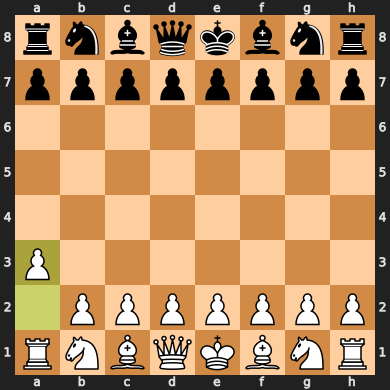

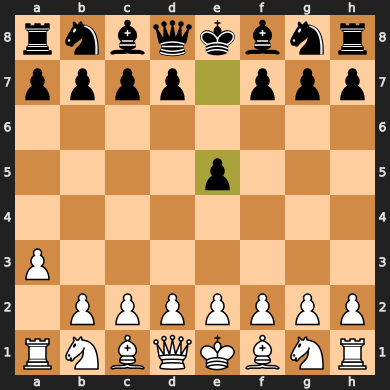

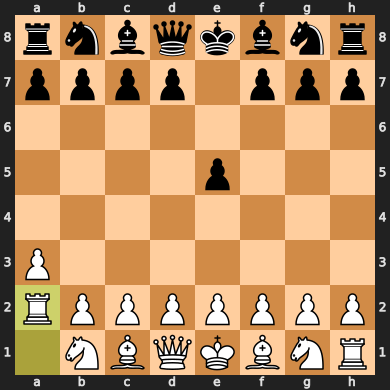

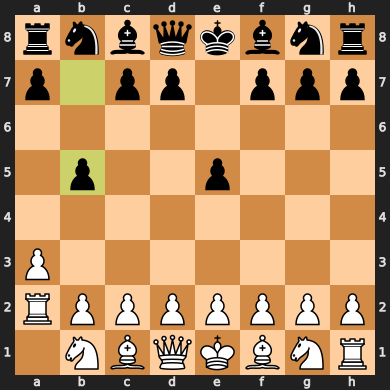

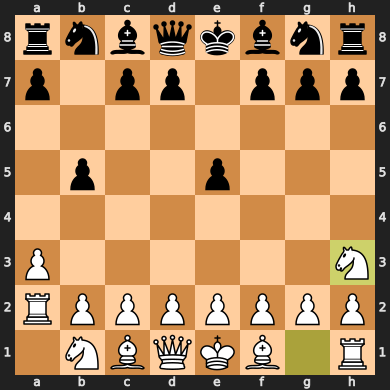

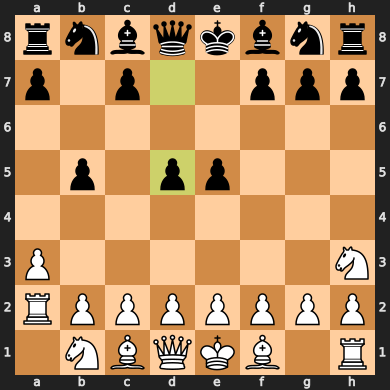

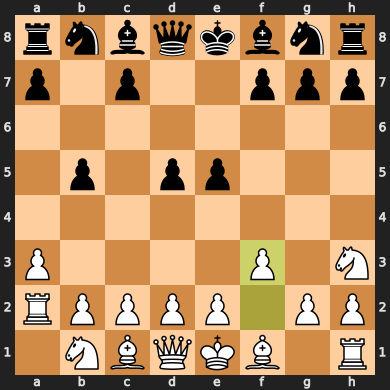

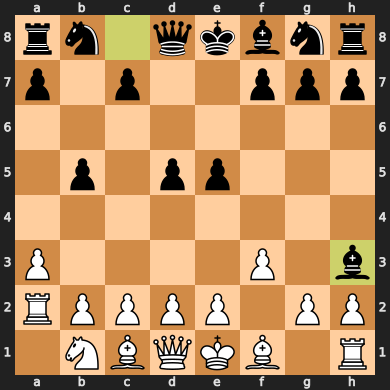

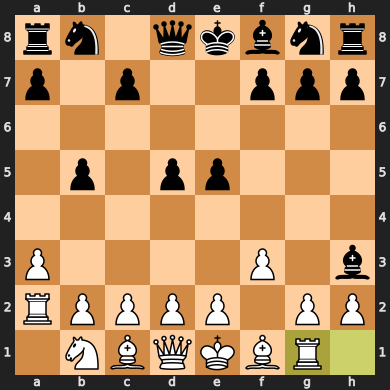

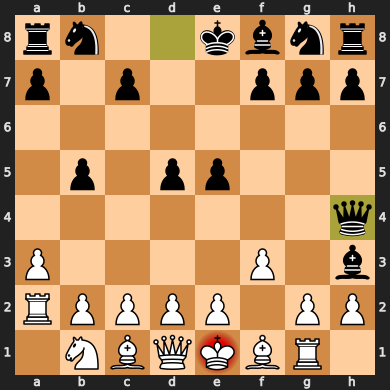

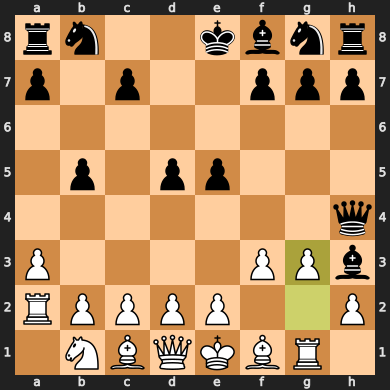

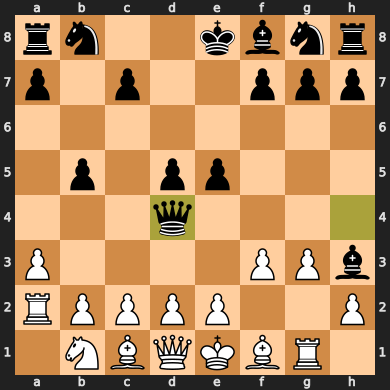

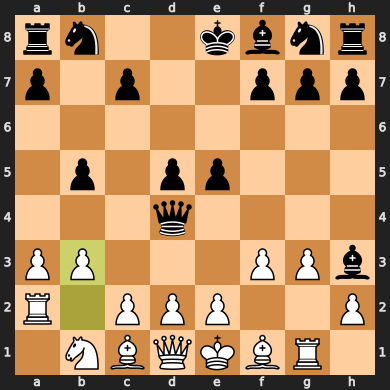

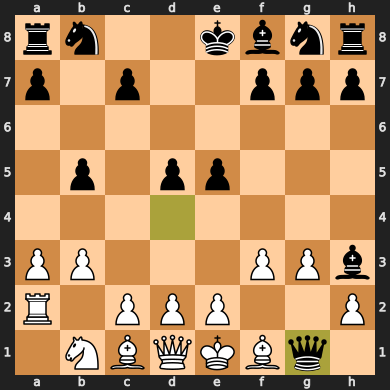

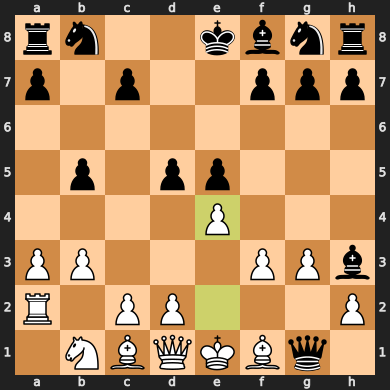

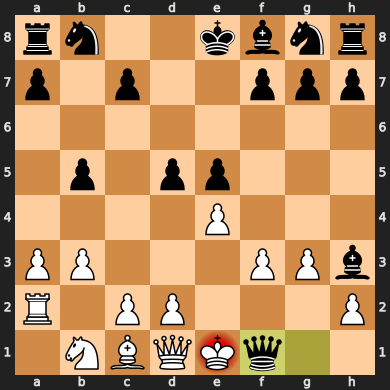

'0-1'

In [5]:
def play_random_vs_minimax(depth=3):
    """
    Fait jouer un joueur aléatoire contre Minimax
    """
    board = chess.Board()
    while not board.is_game_over():
        if board.turn:  # Tour des blancs (aléatoire)
            moves = list(board.generate_legal_moves())
            move = random.choice(moves)
        else:  # Tour des noirs (Minimax)
            move = get_best_move_minimax(board, depth, color=False)
        
        board.push(move)
        display(board)
    
    return board.result()

play_random_vs_minimax(depth=3)

# Partie 3

### Question 1

Faites évoluer votre code Minimax en α − β. Comparez les temps de recherche et le nombre de noeuds
explorés sur plusieurs plateaux de jeu entre les deux méthodes, à profondeur égale. Faites un match
Minimax contre α − β à profondeur égales.

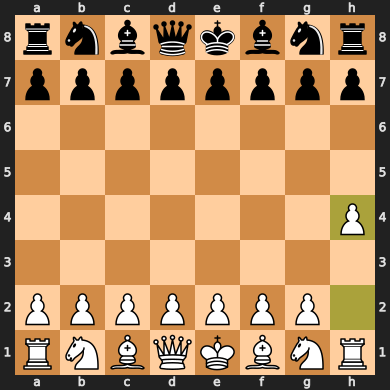

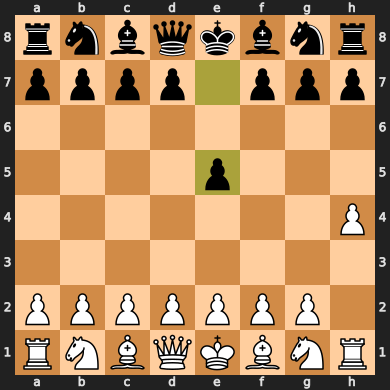

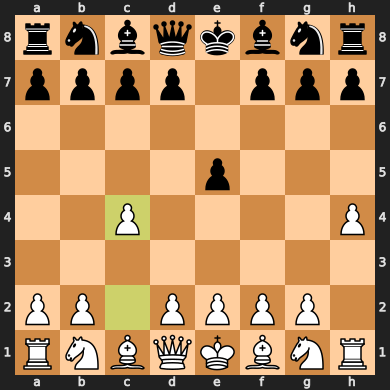

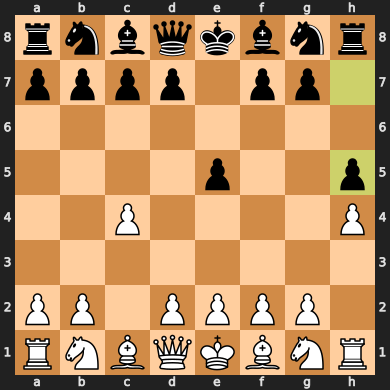

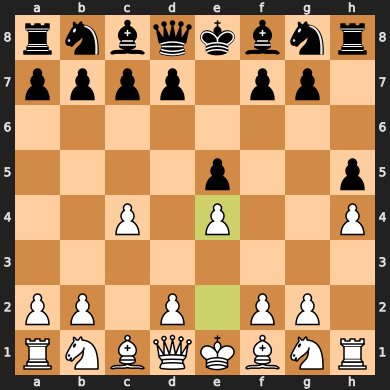

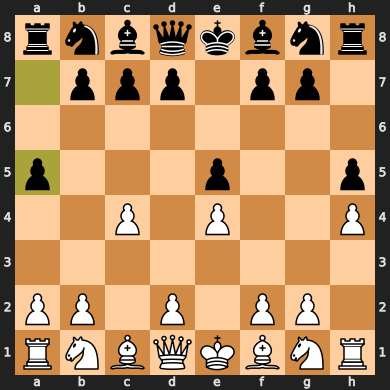

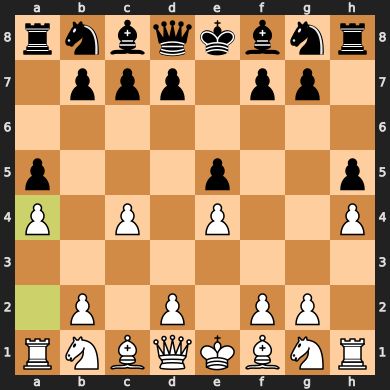

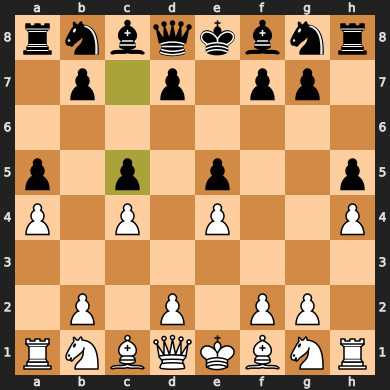

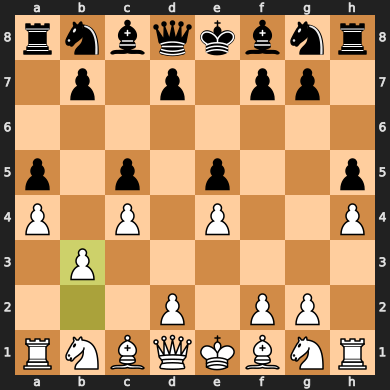

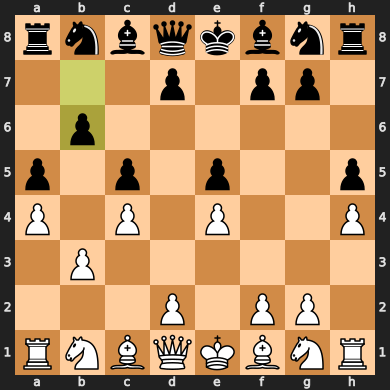

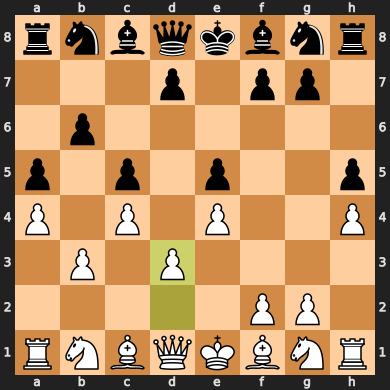

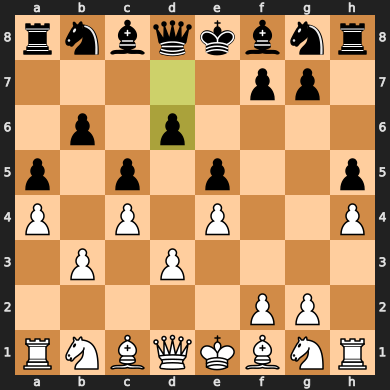

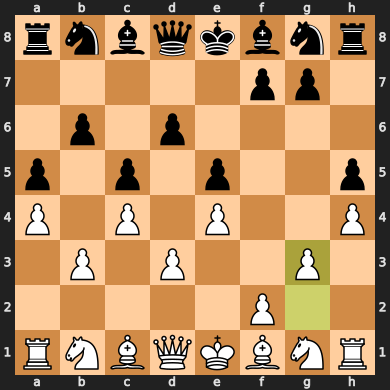

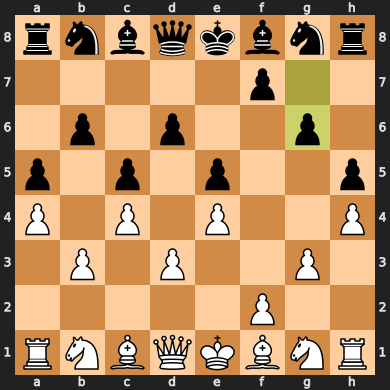

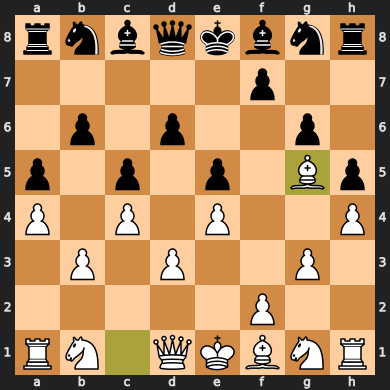

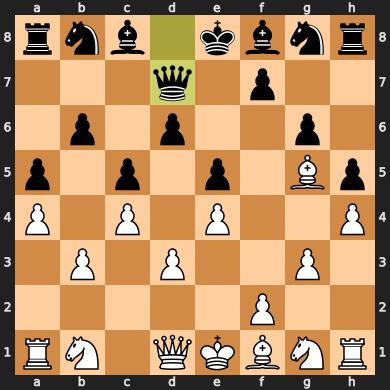

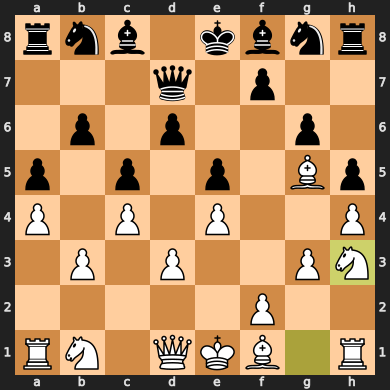

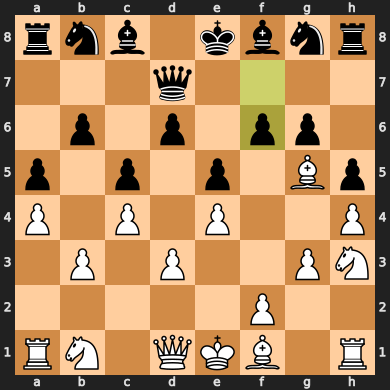

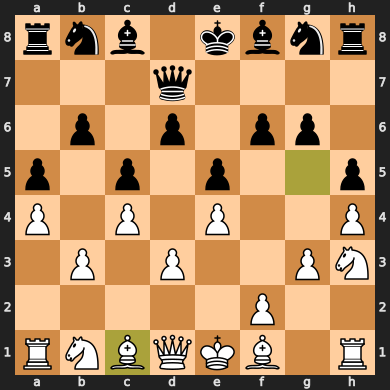

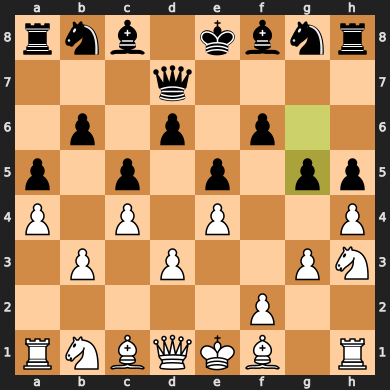

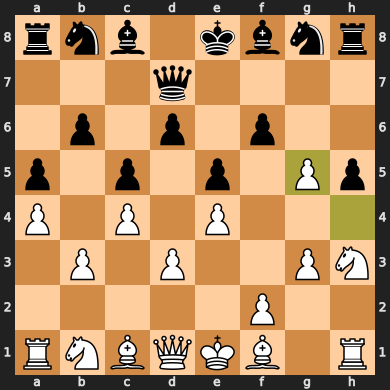

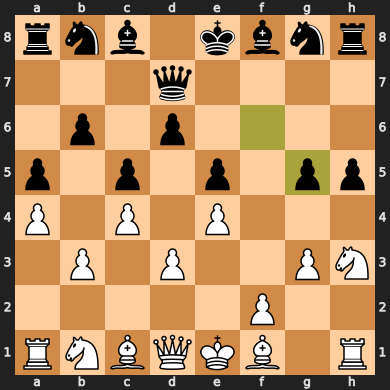

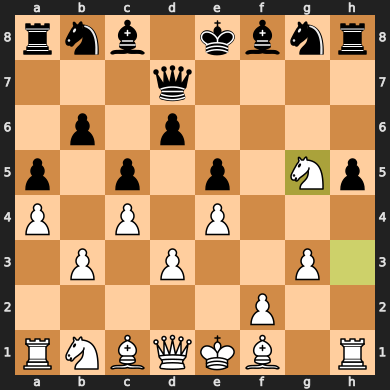

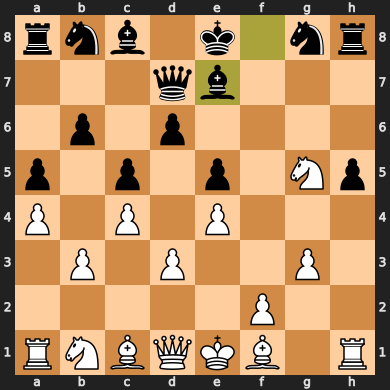

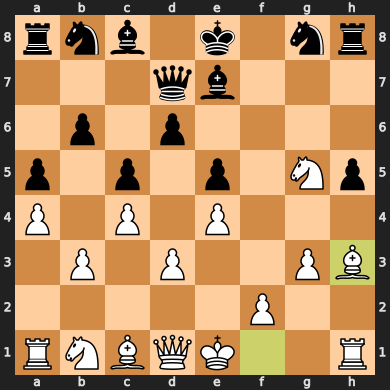

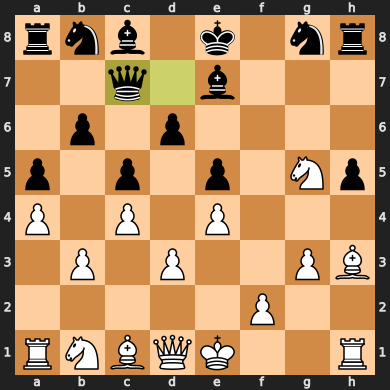

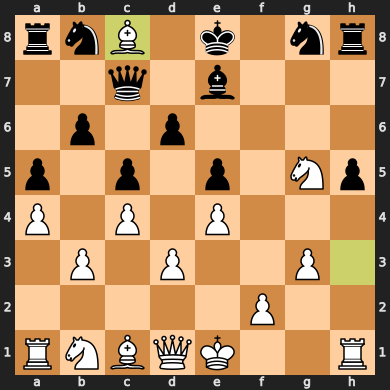

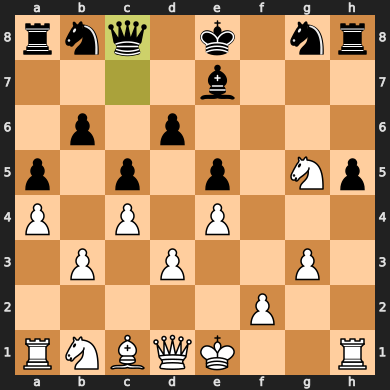

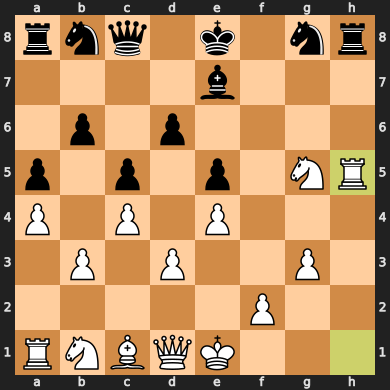

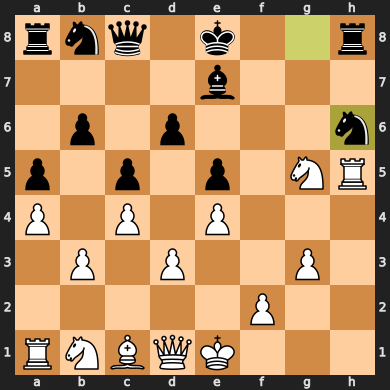

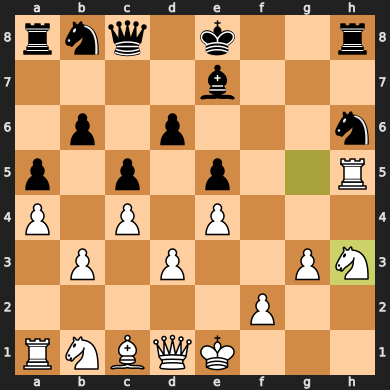

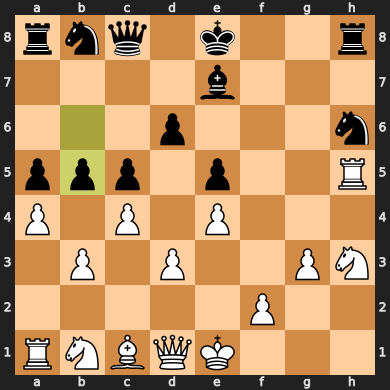

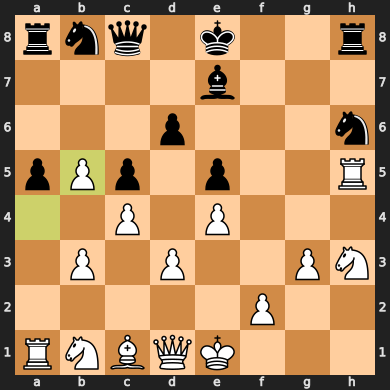

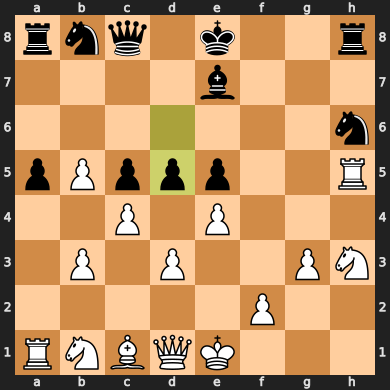

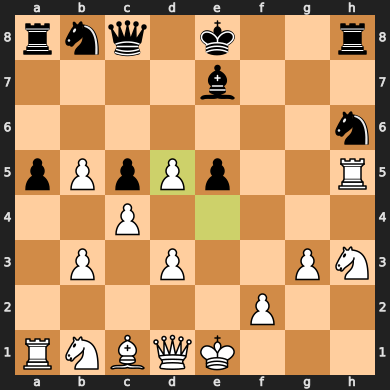

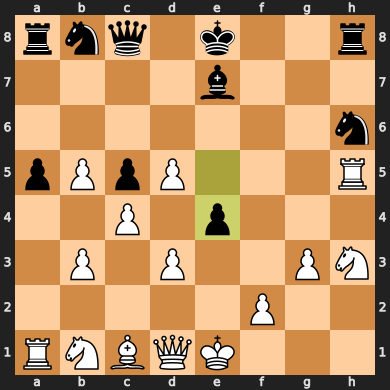

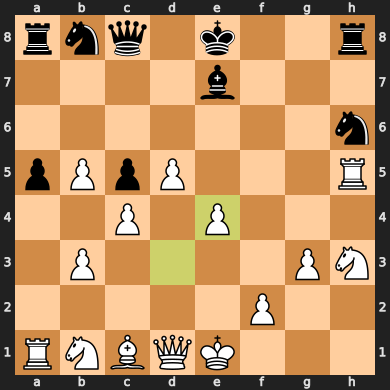

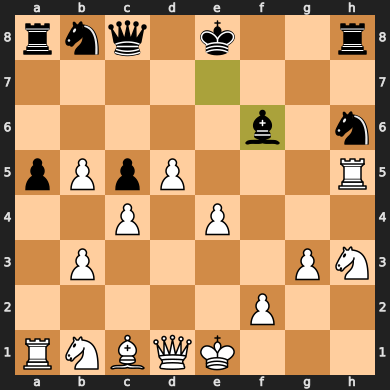

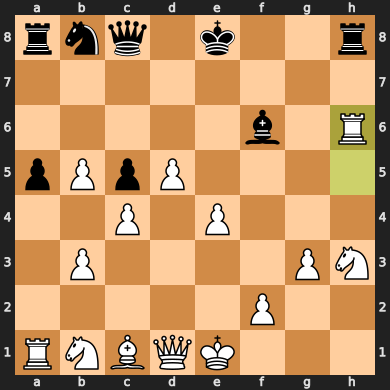

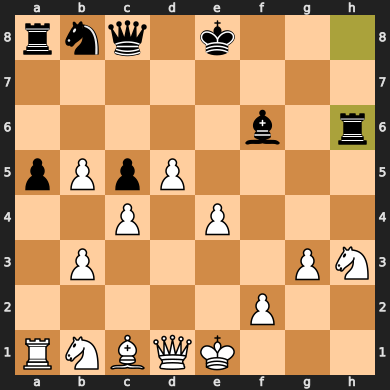

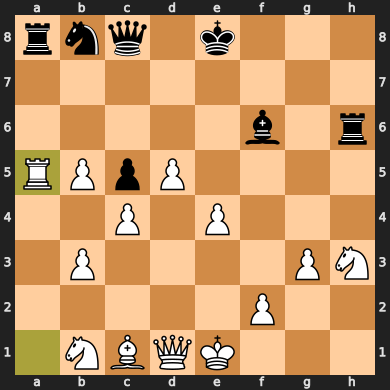

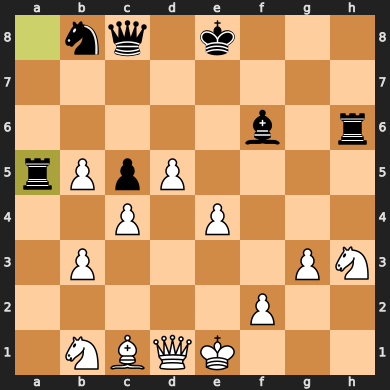

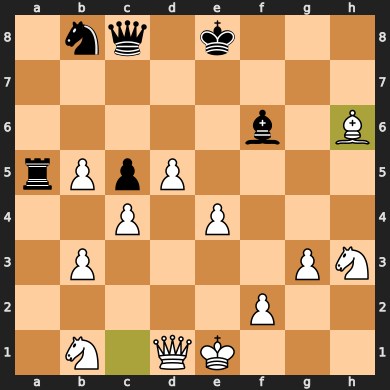

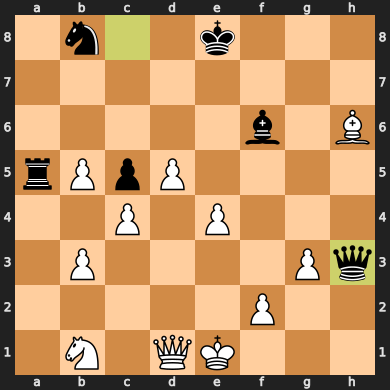

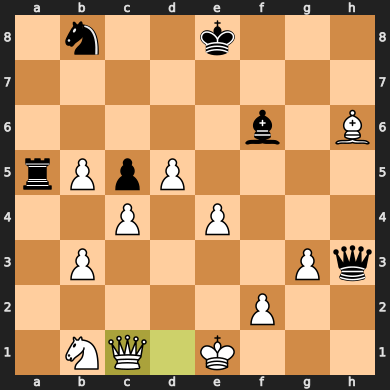

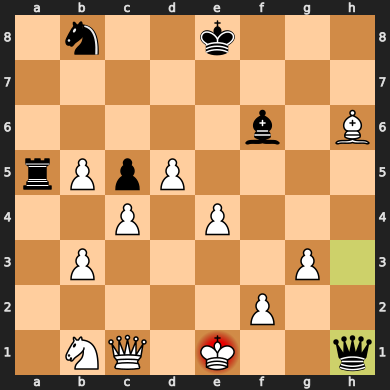

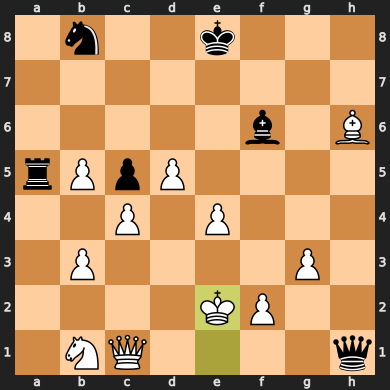

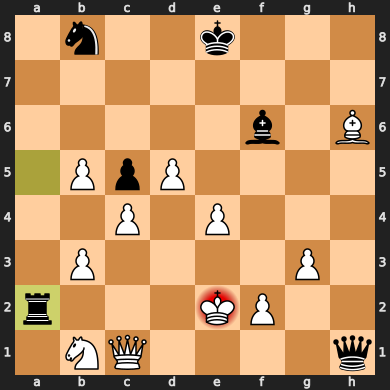

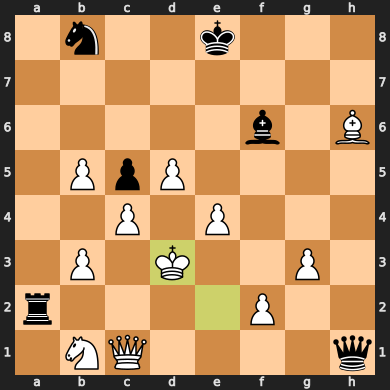

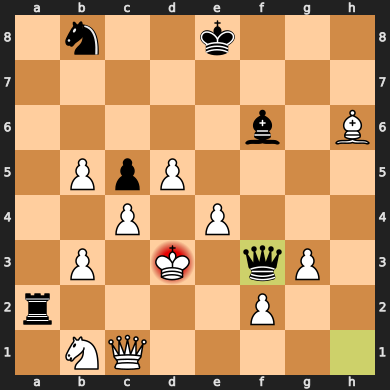

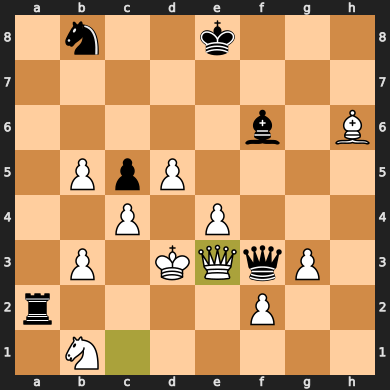

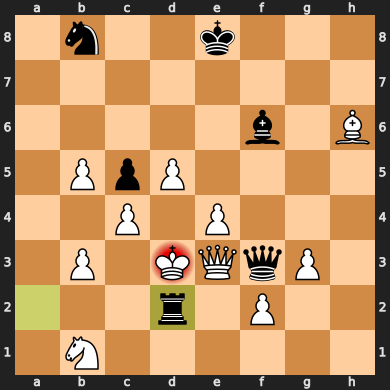

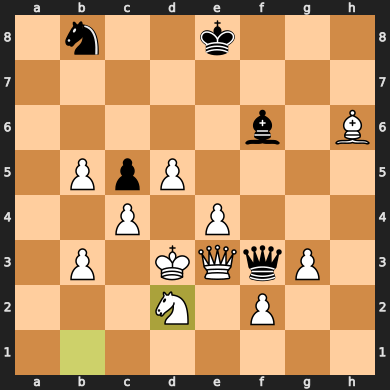

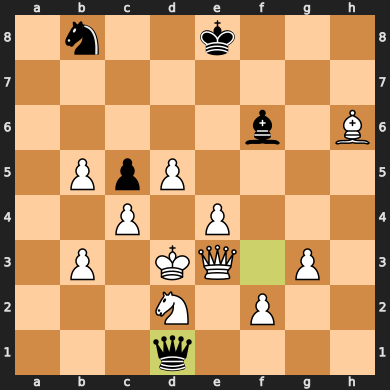

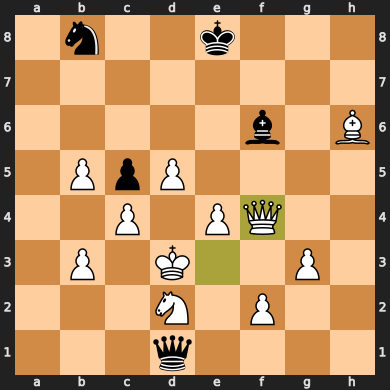

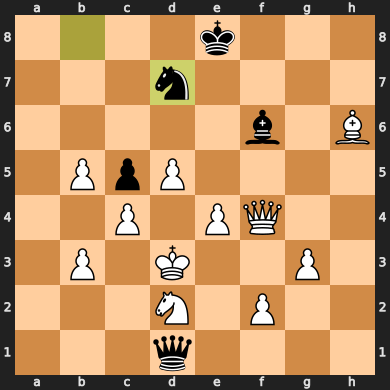

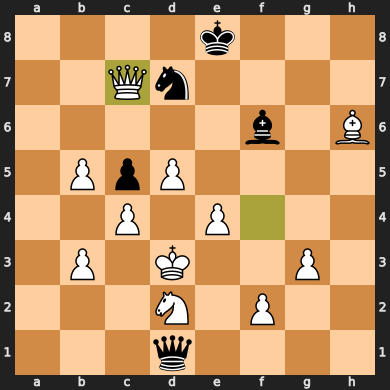

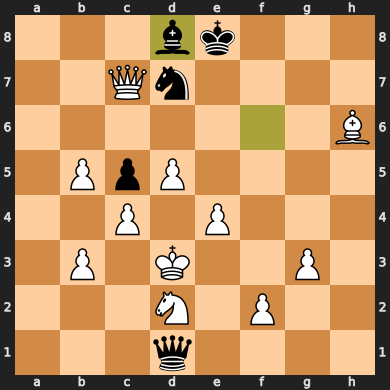

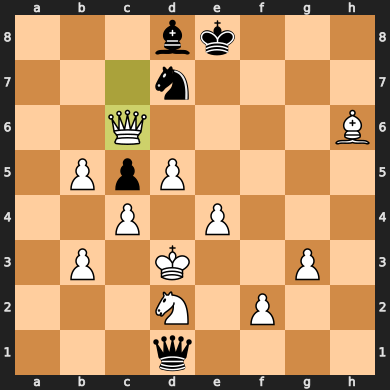

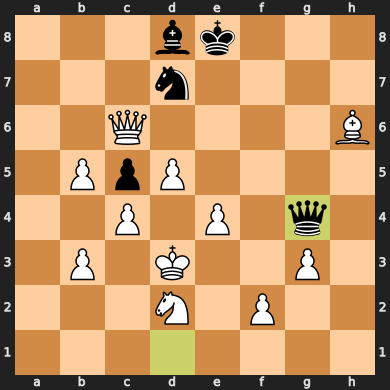

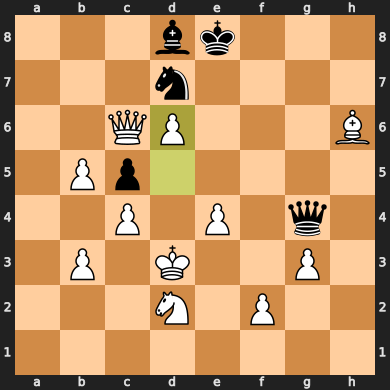

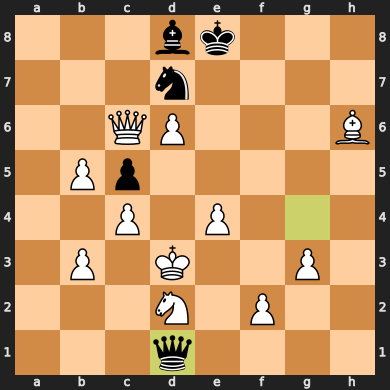

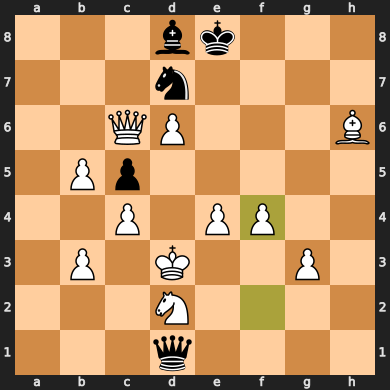

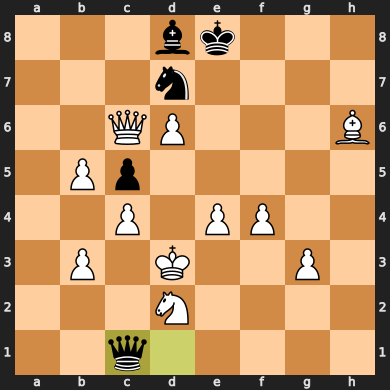

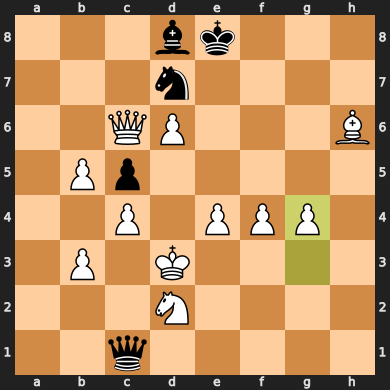

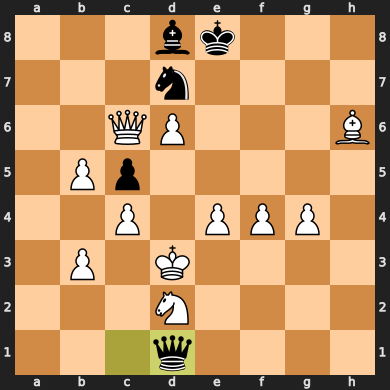

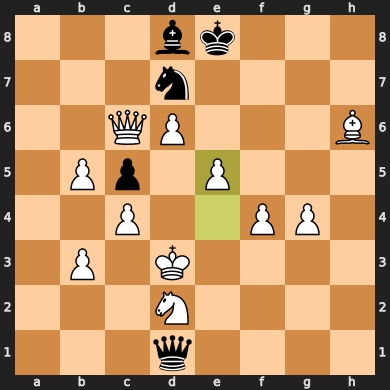

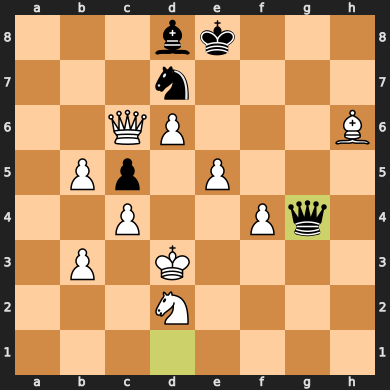

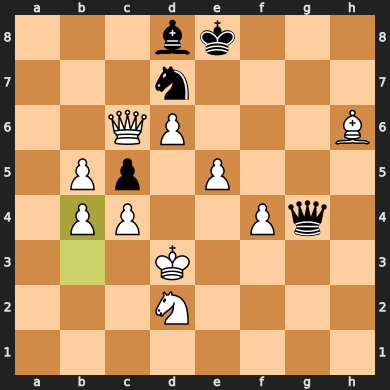

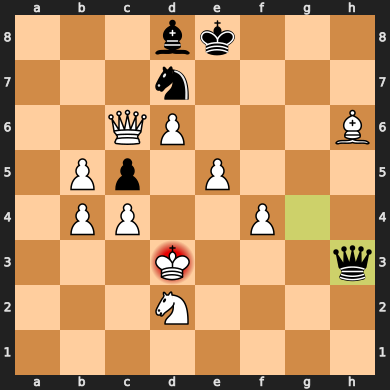

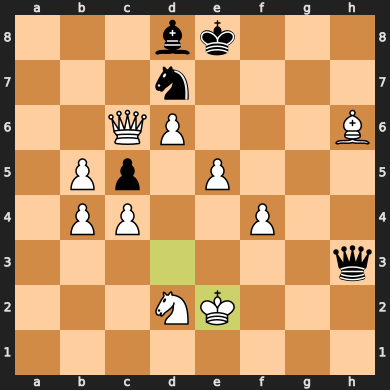

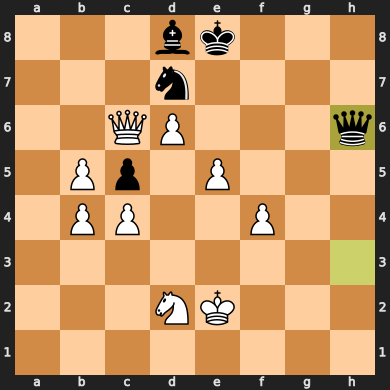

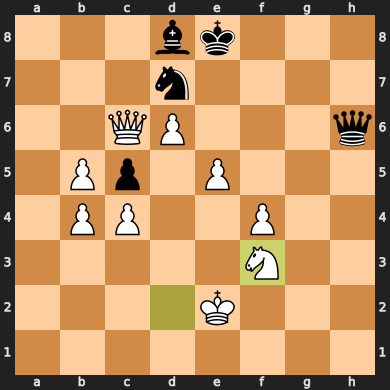

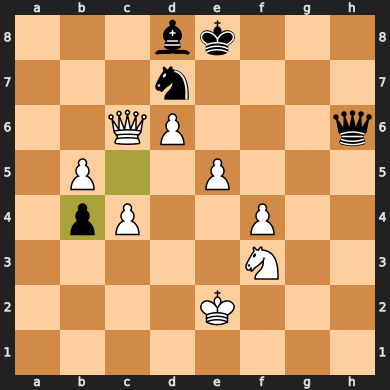

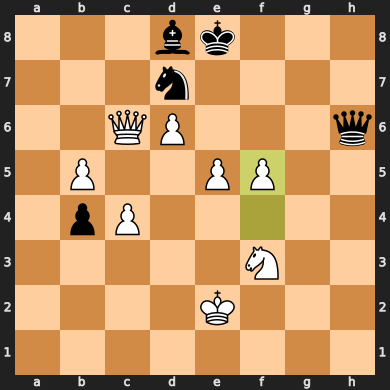

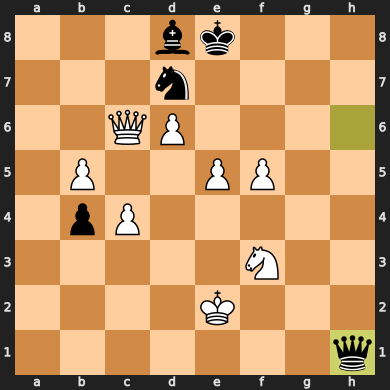

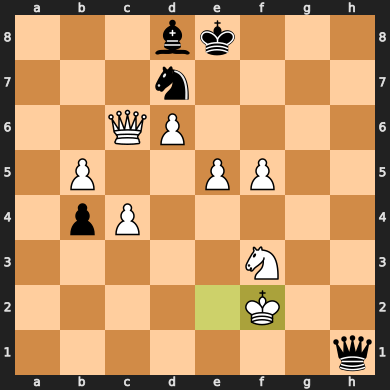

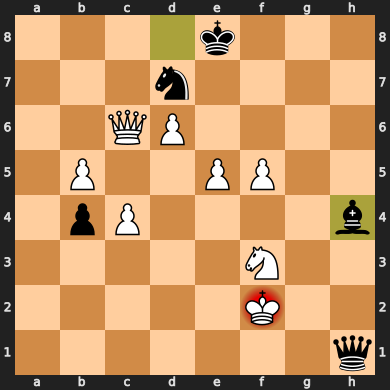

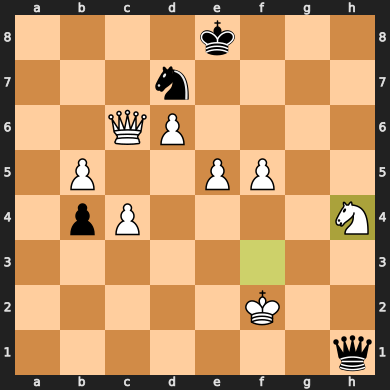

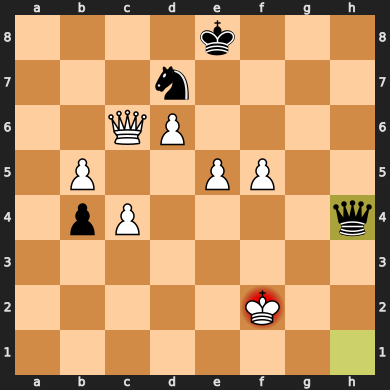

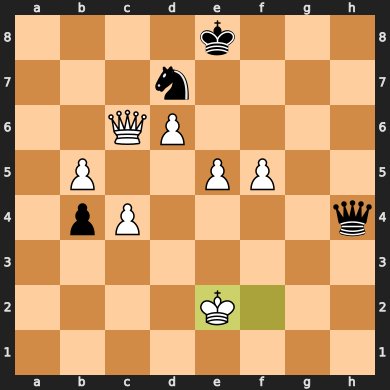

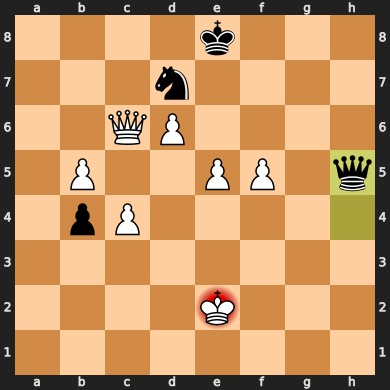

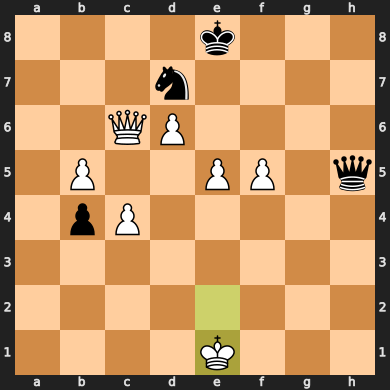

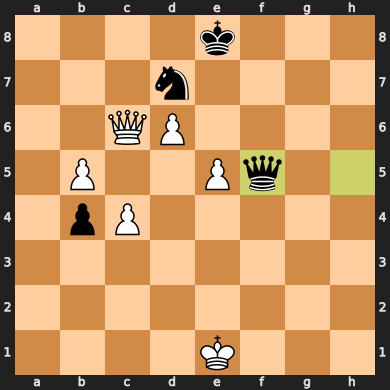

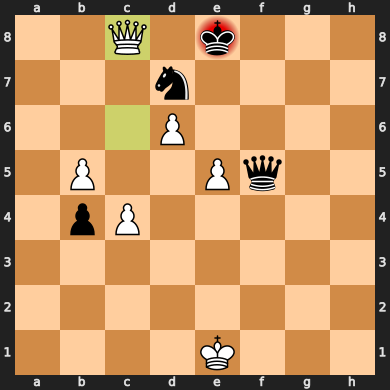

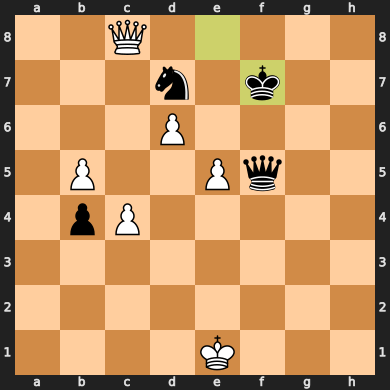

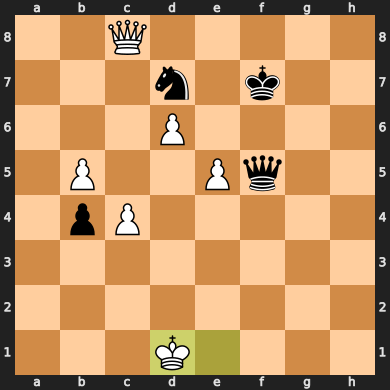

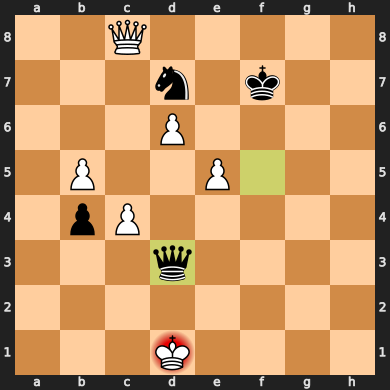

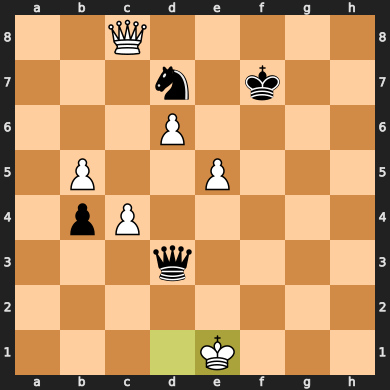

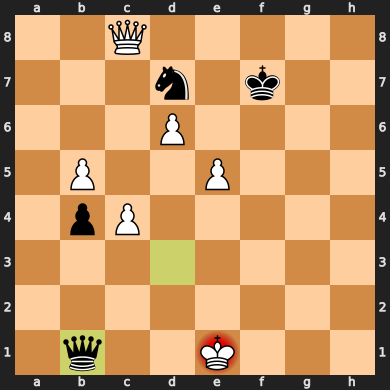

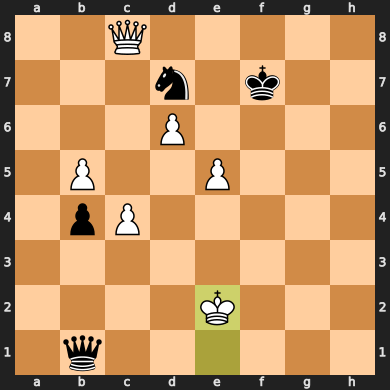

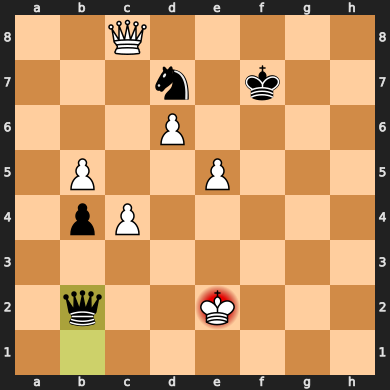

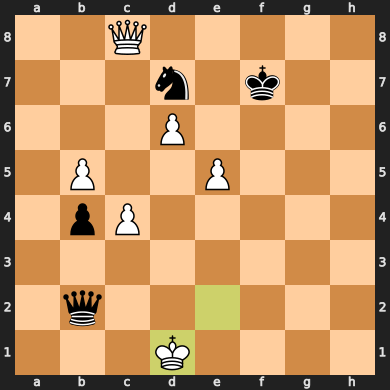

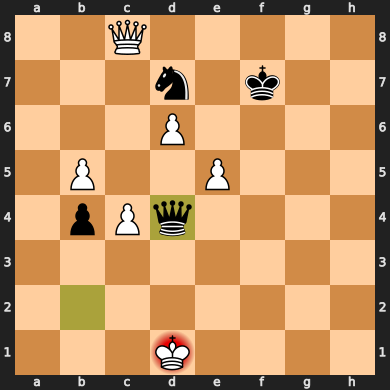

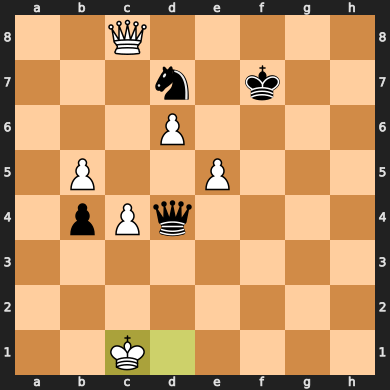

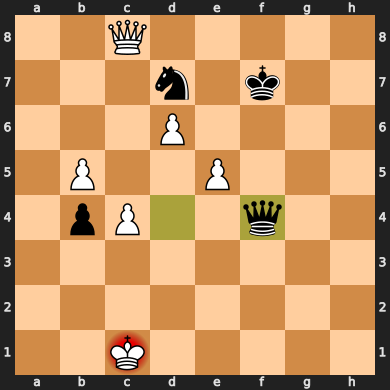

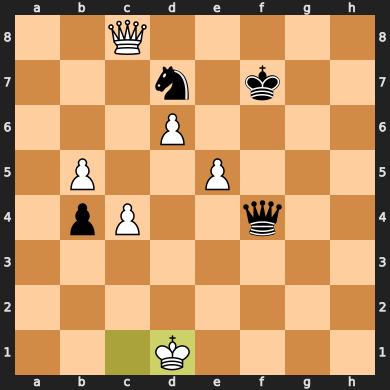

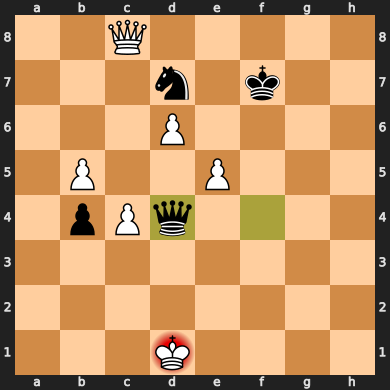

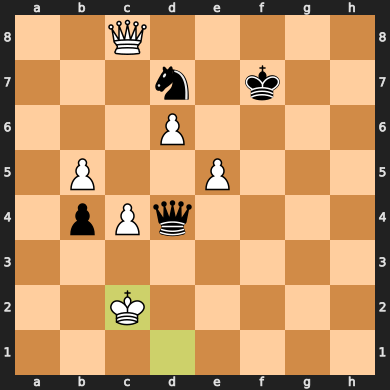

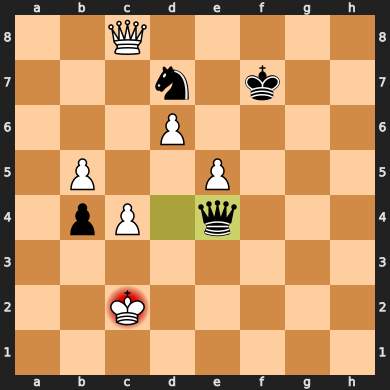

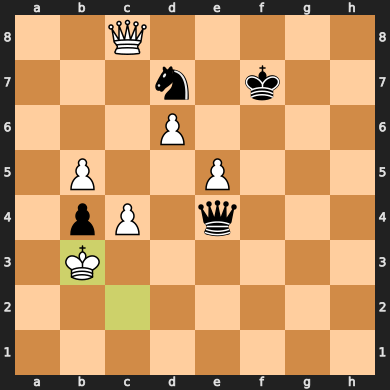

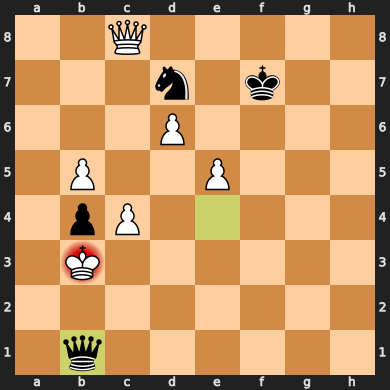

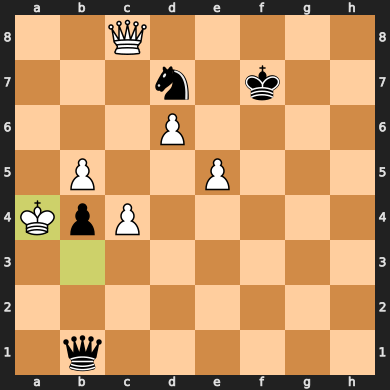

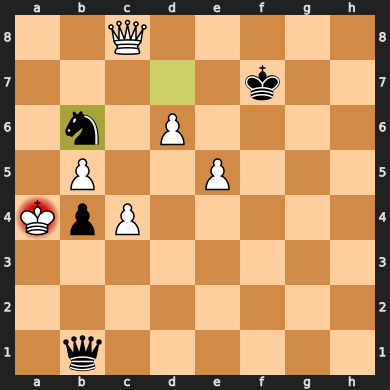

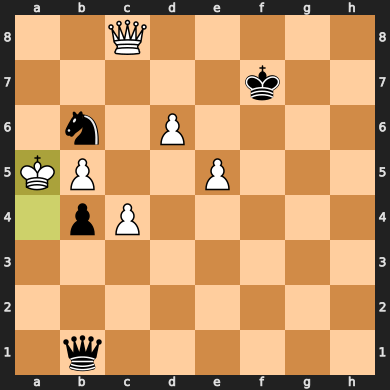

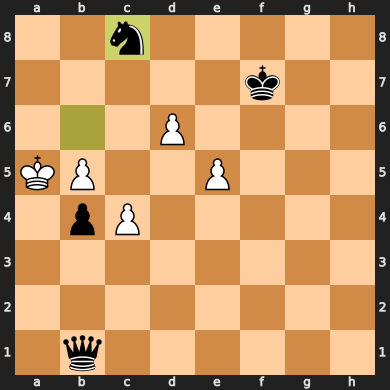

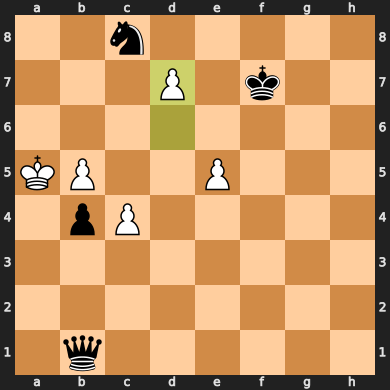

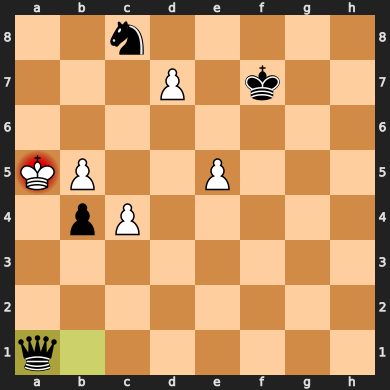

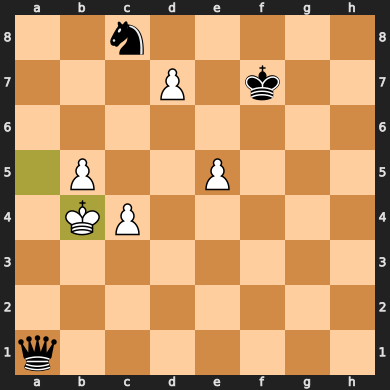

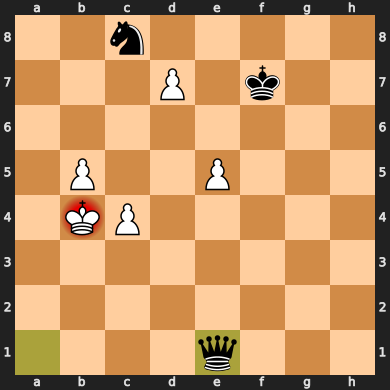

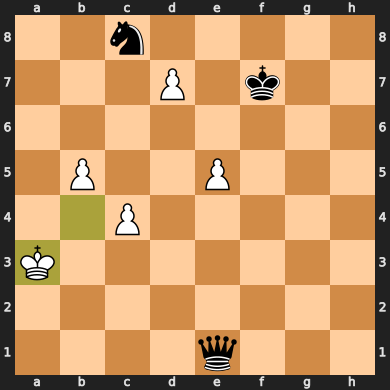

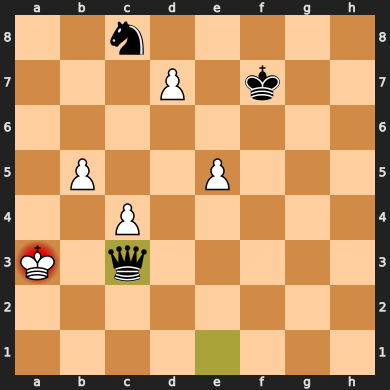

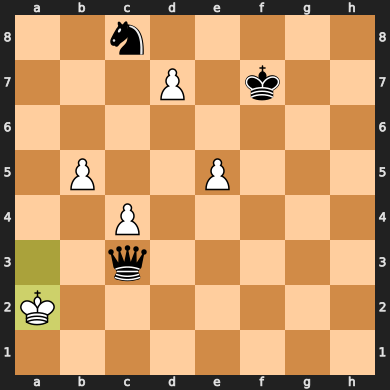

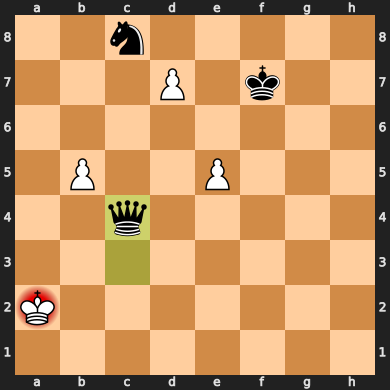

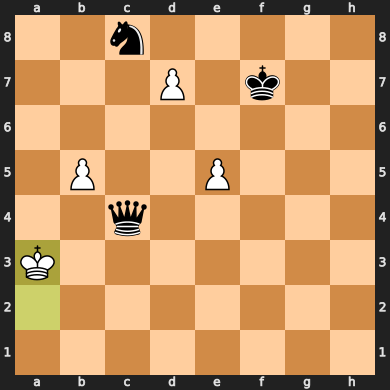

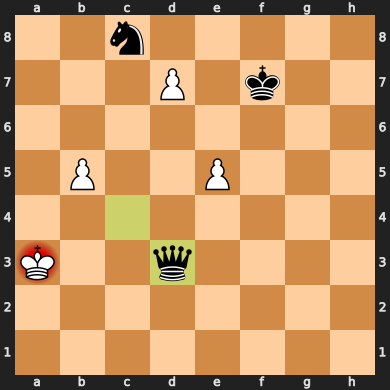

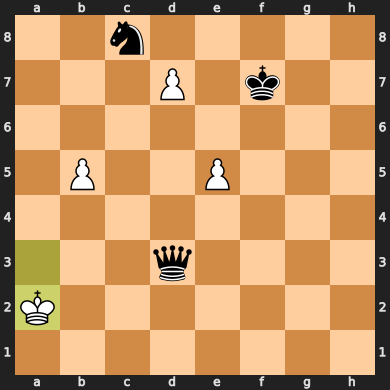

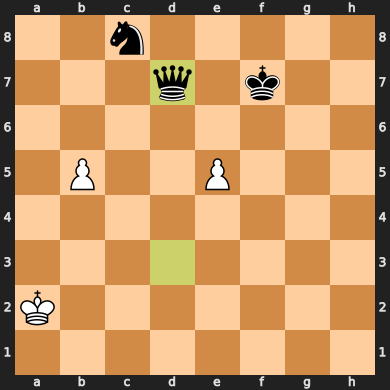

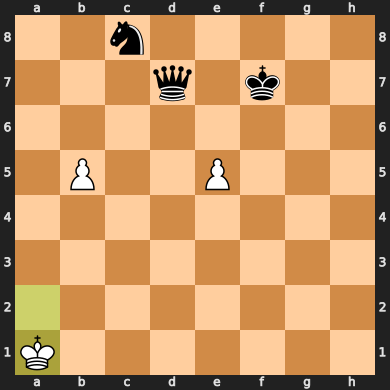

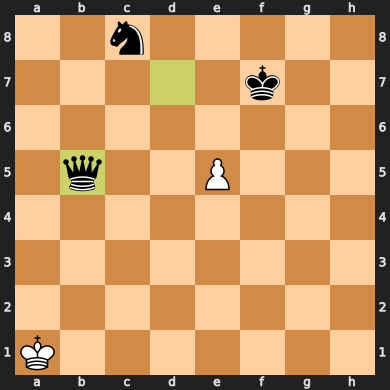

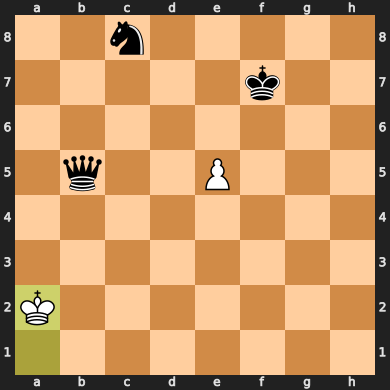

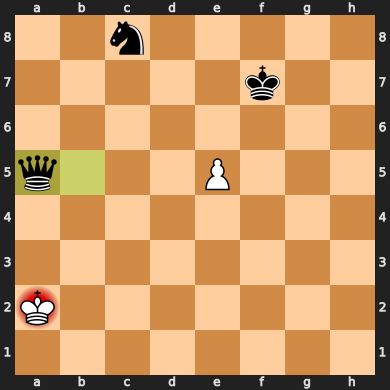

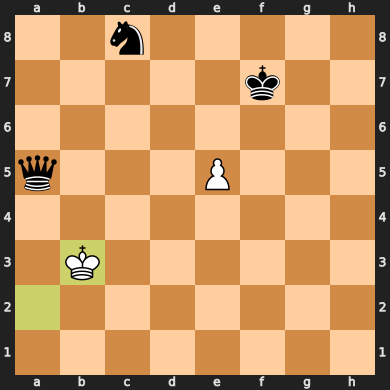

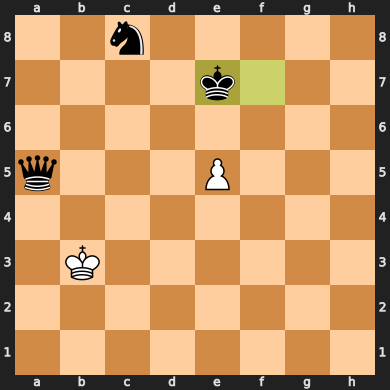

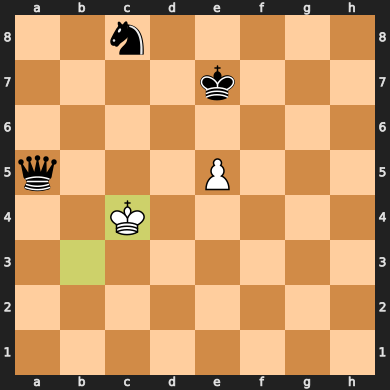

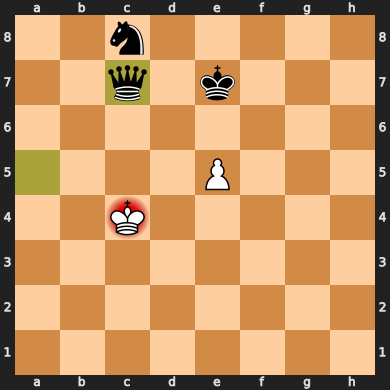

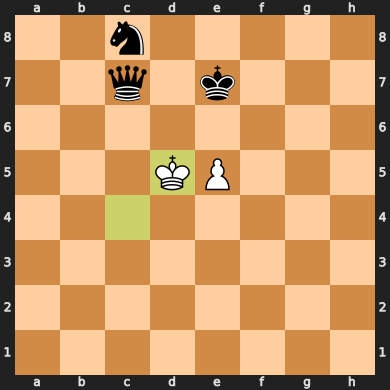

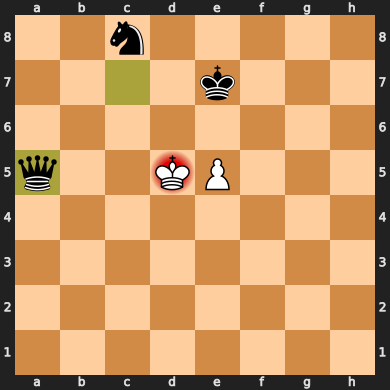

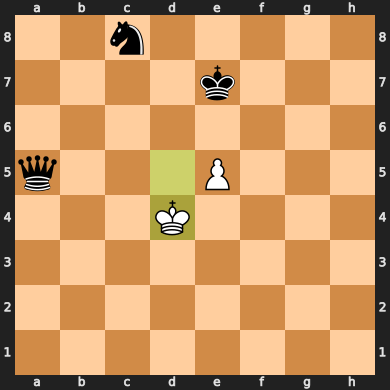

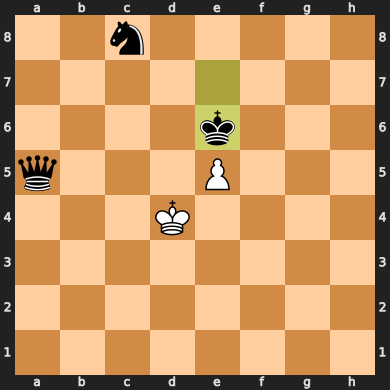

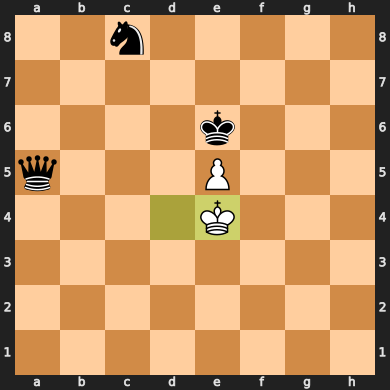

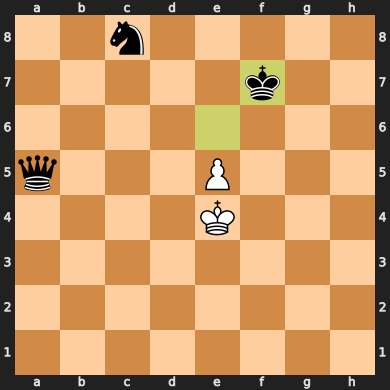

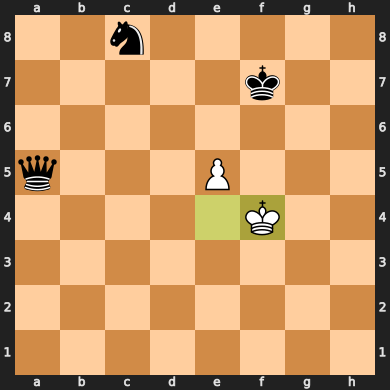

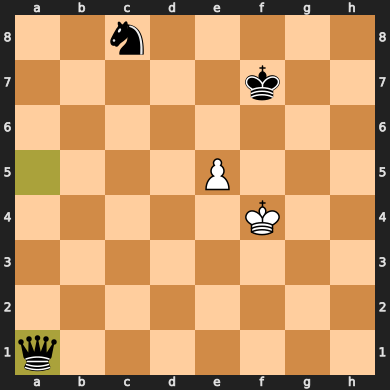

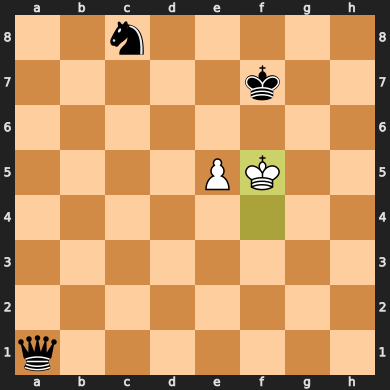

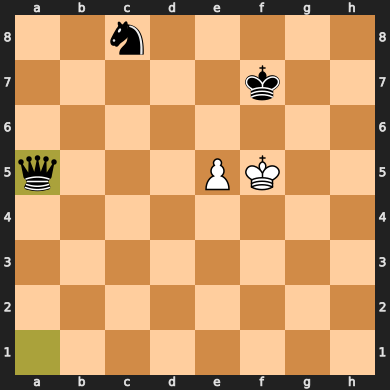

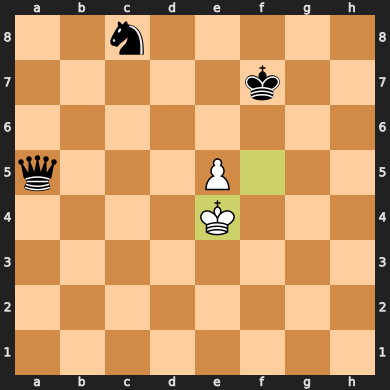

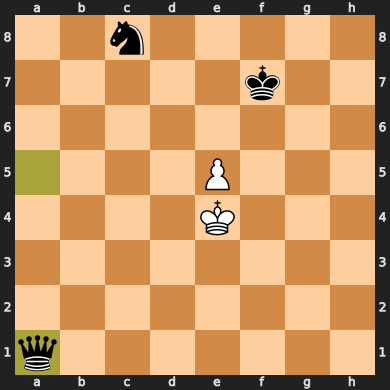

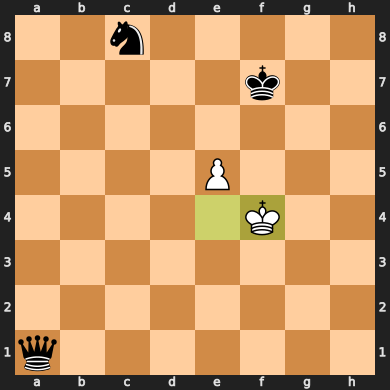

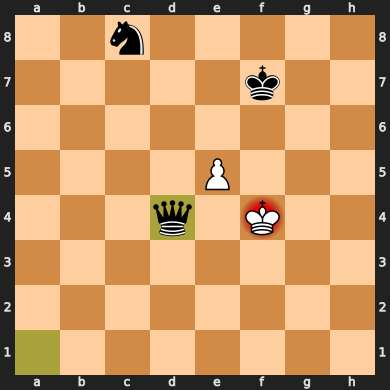

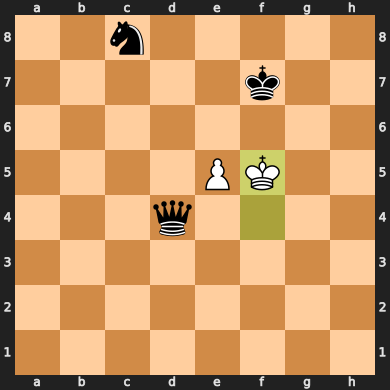

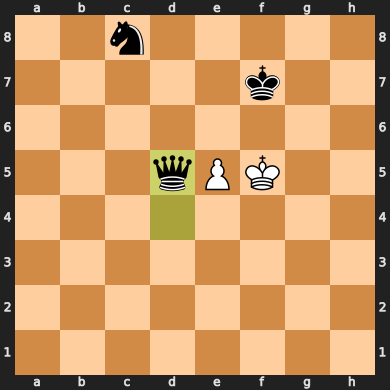

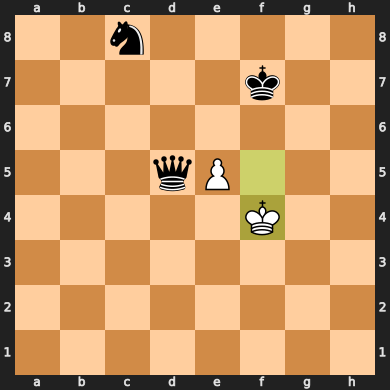

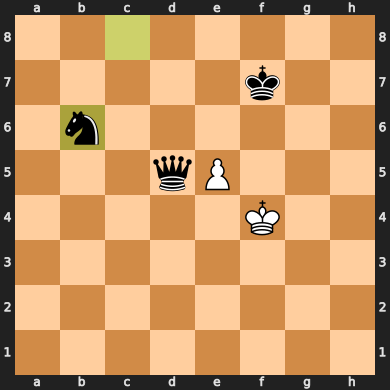

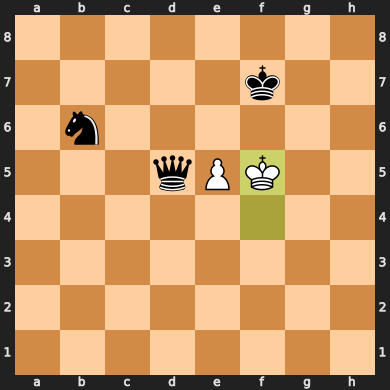

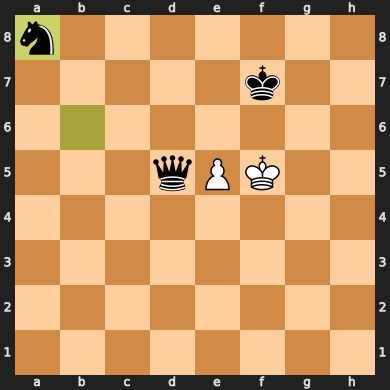

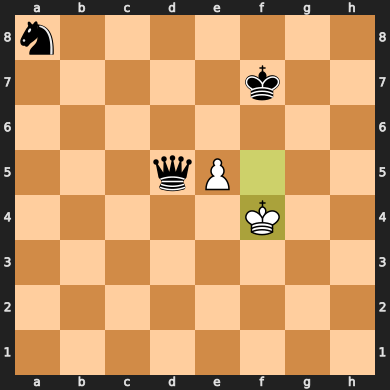

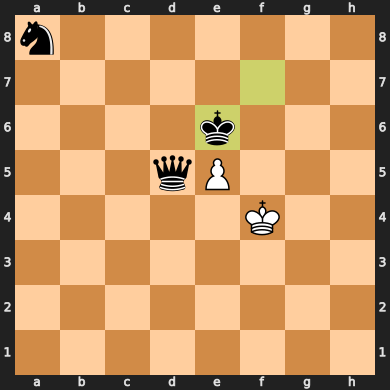

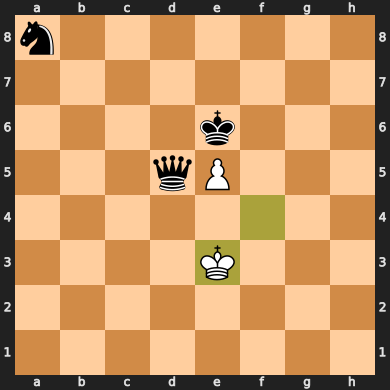

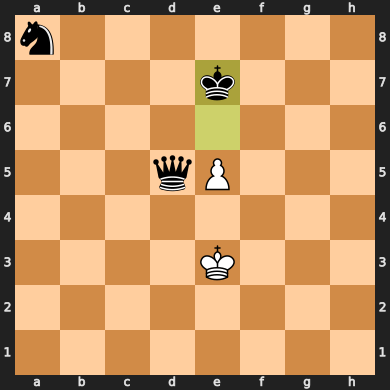

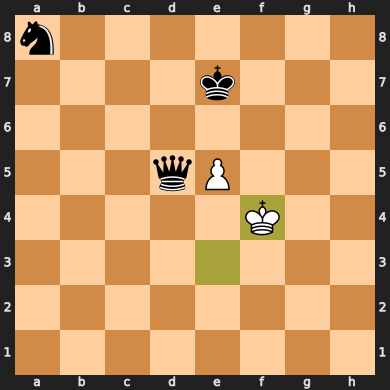

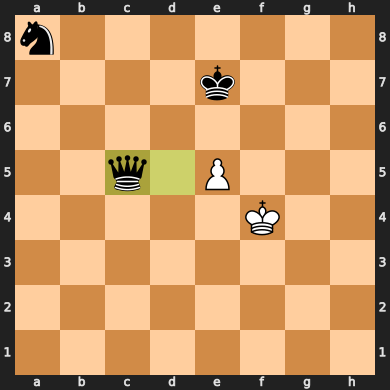

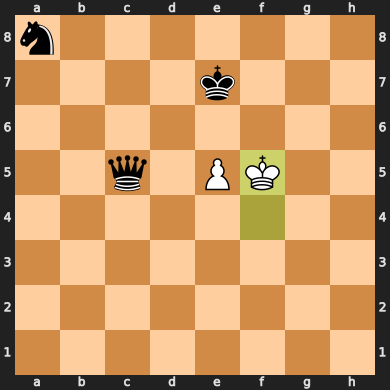

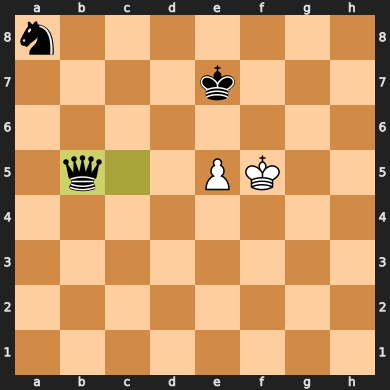

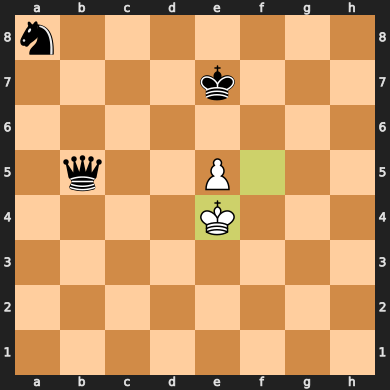

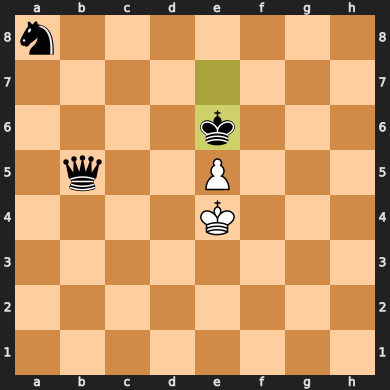

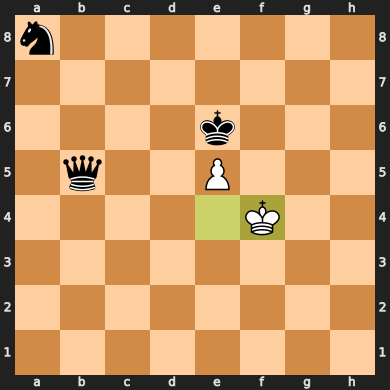

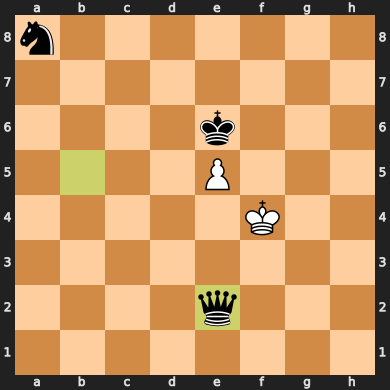

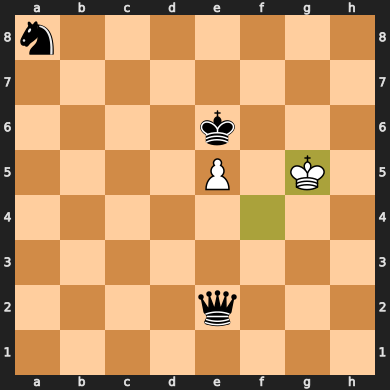

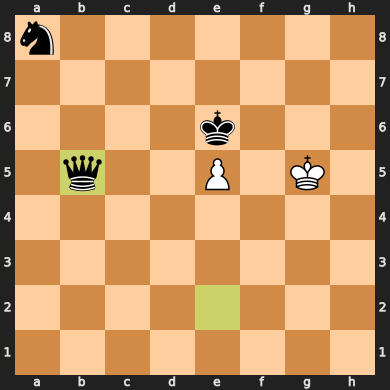

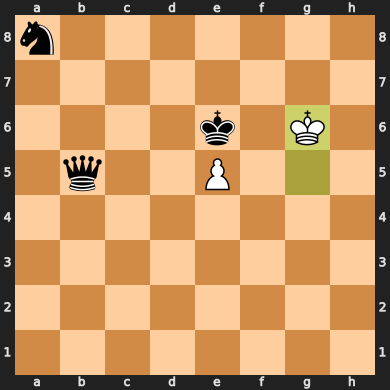

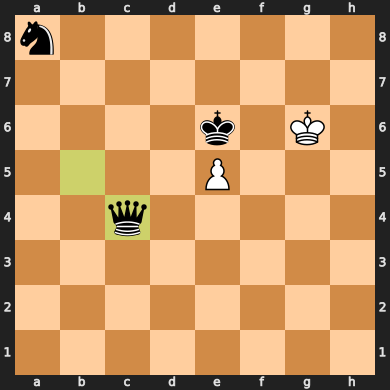

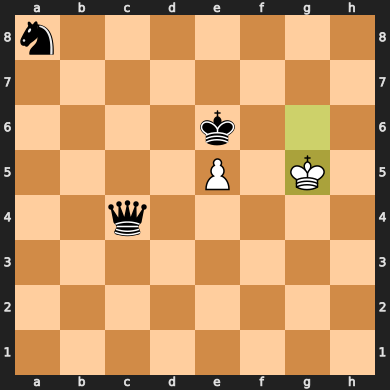

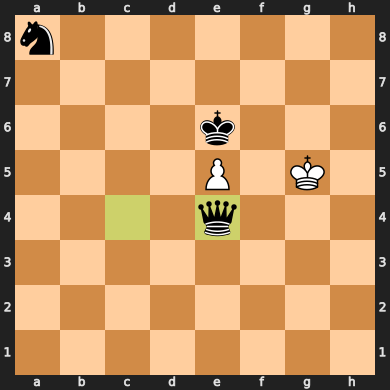

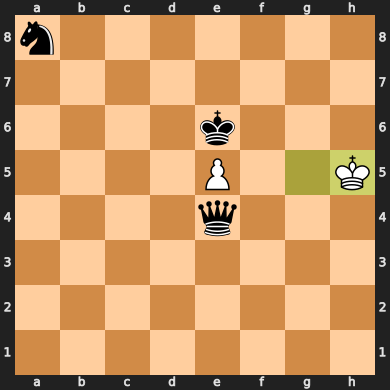

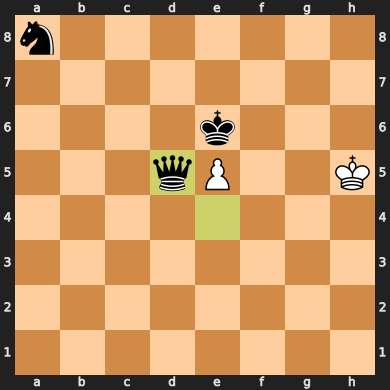

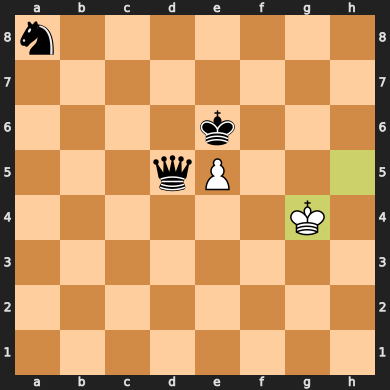

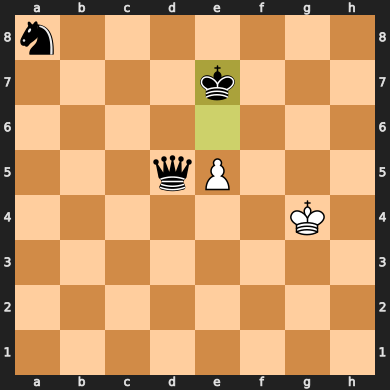

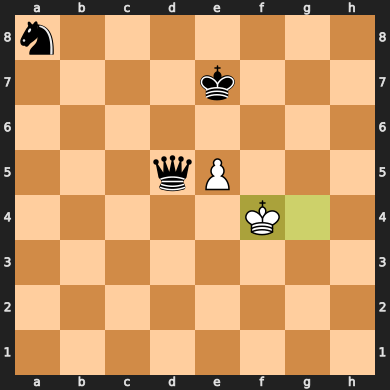

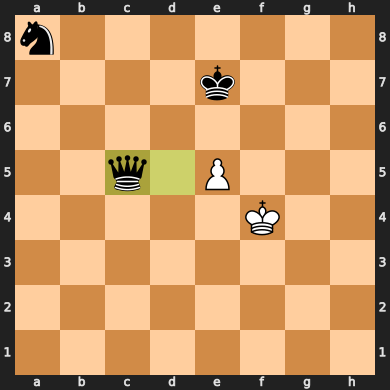

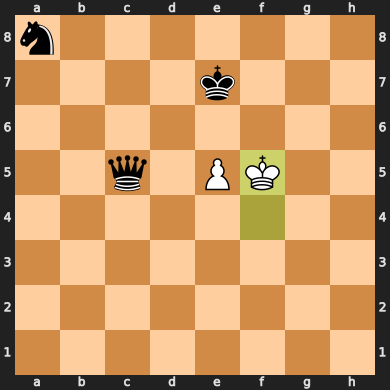

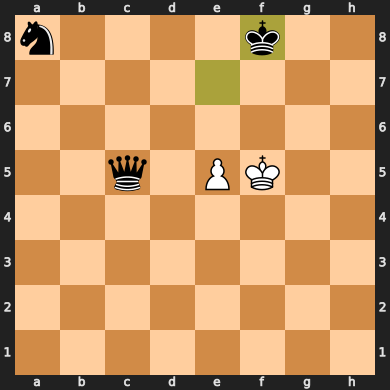

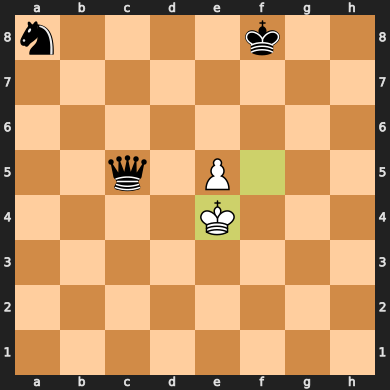

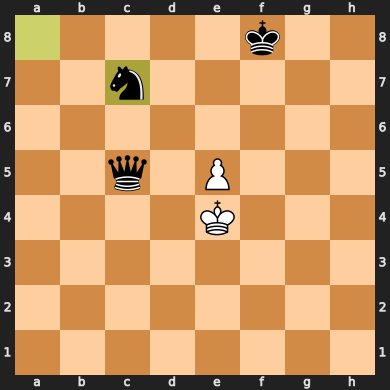

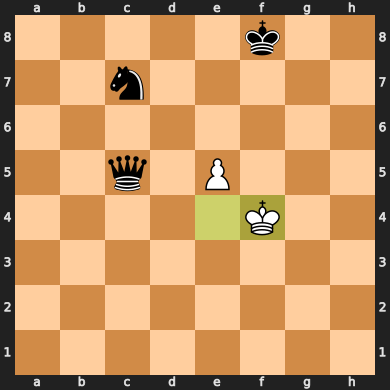

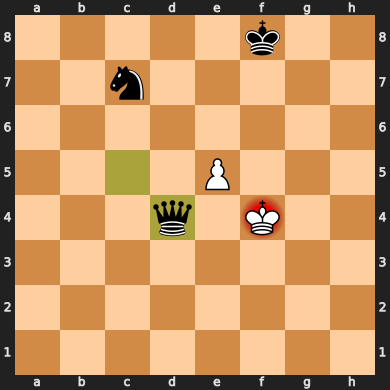

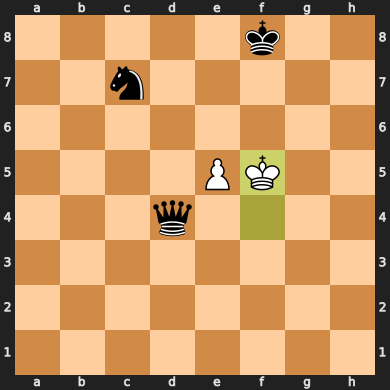

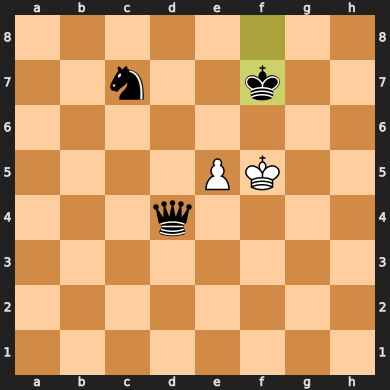

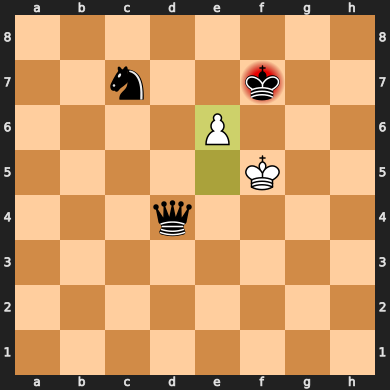

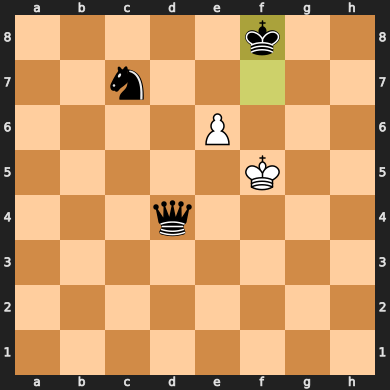

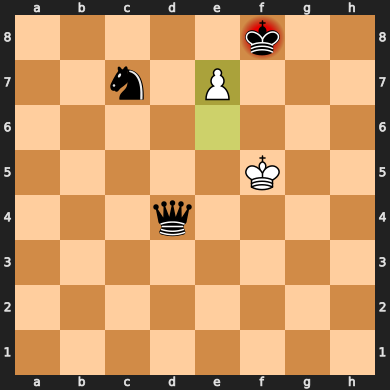

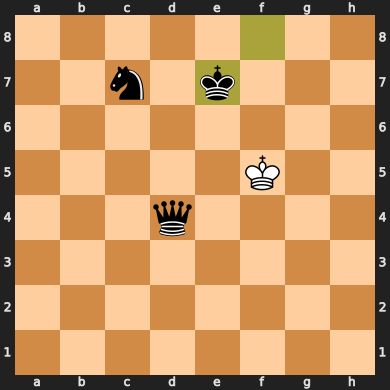

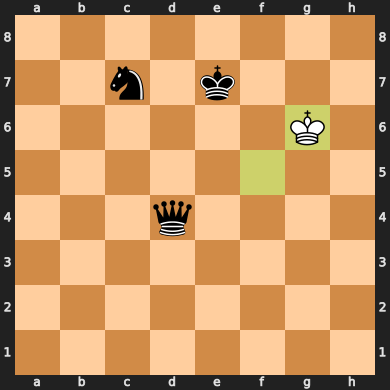

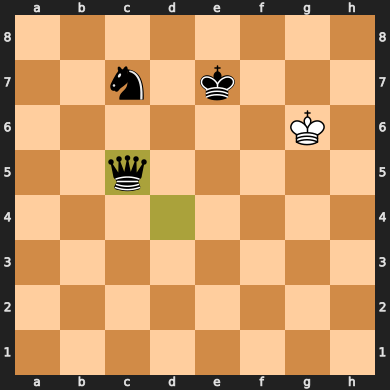

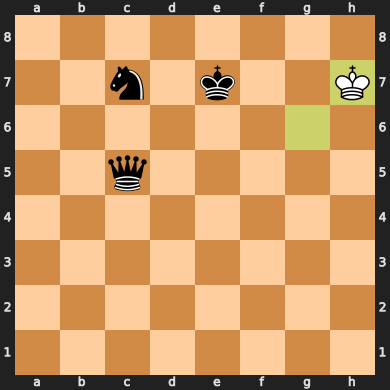

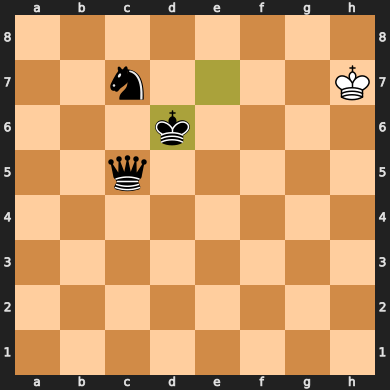

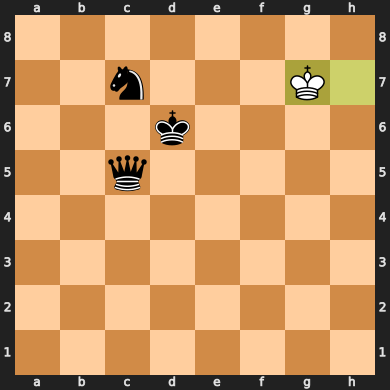

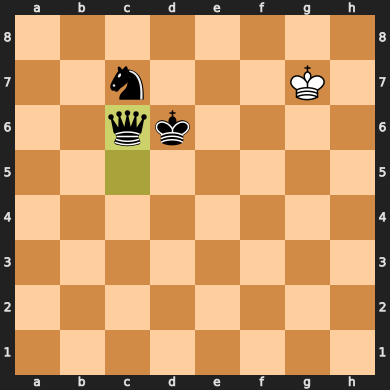

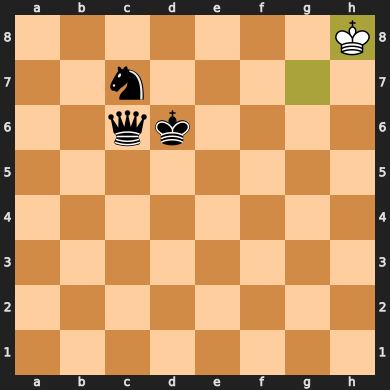

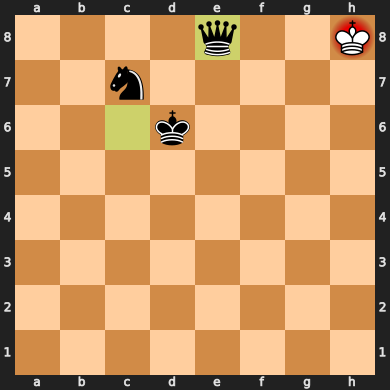

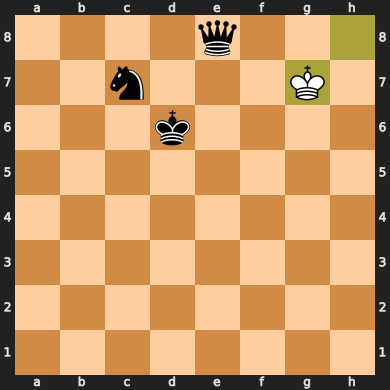

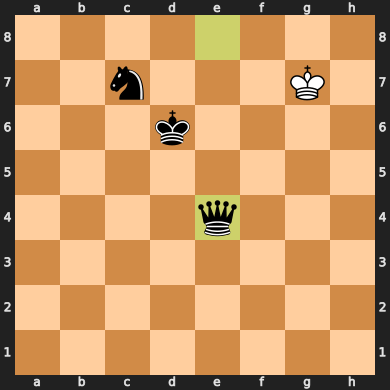

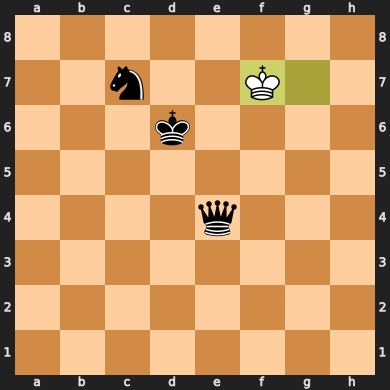

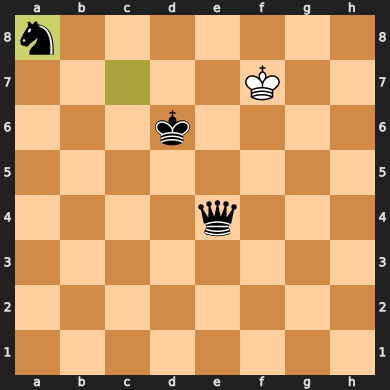

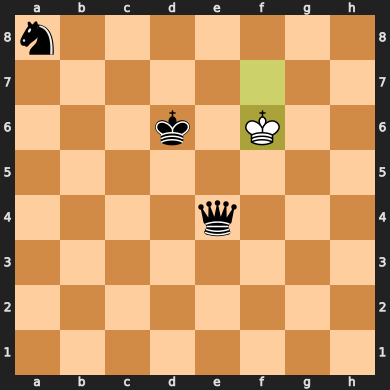

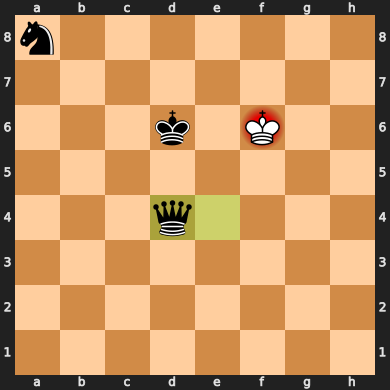

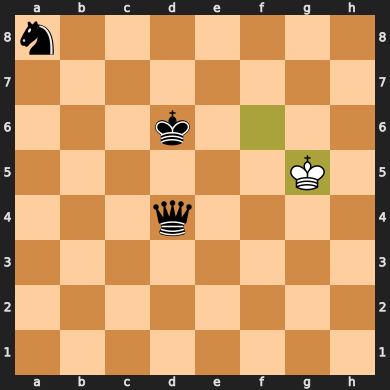

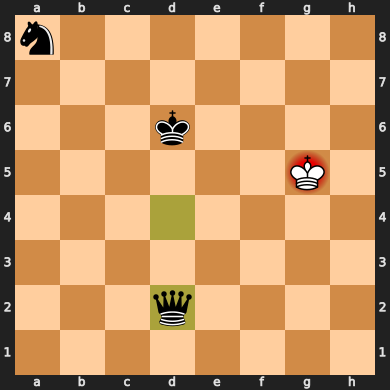

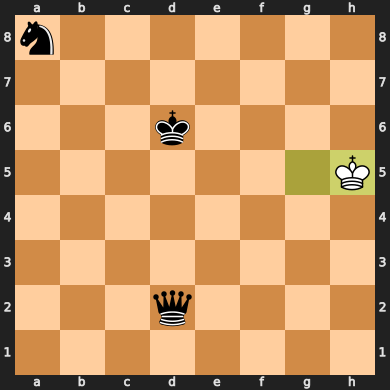

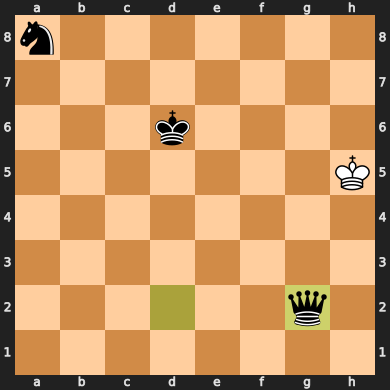

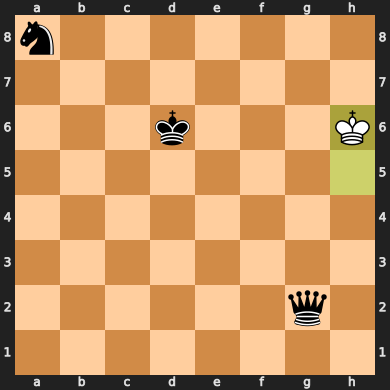

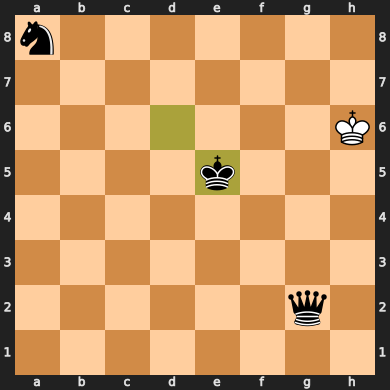

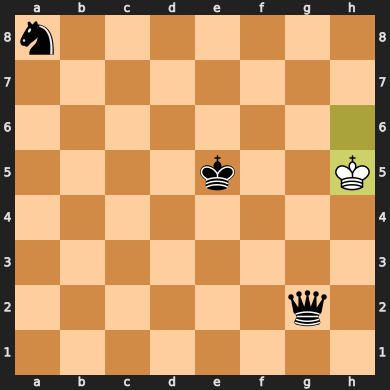

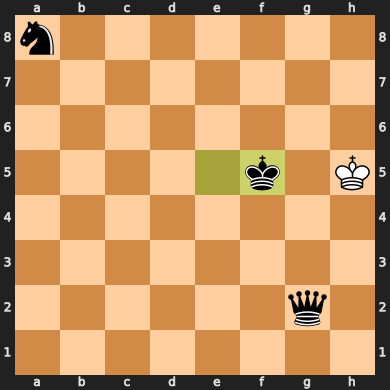

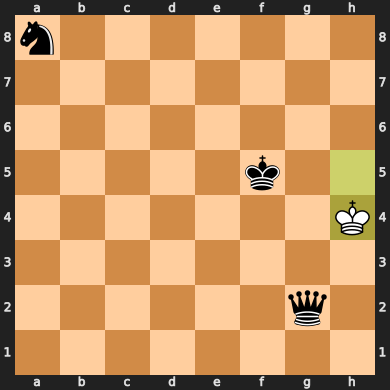

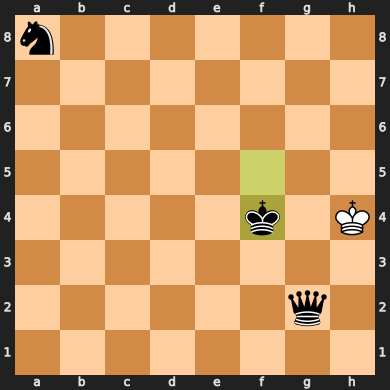

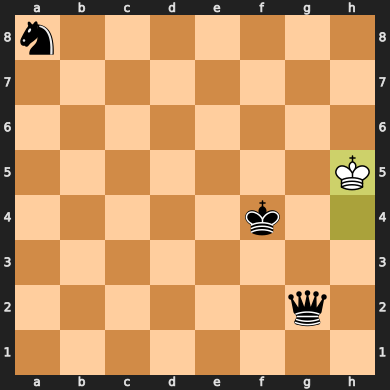

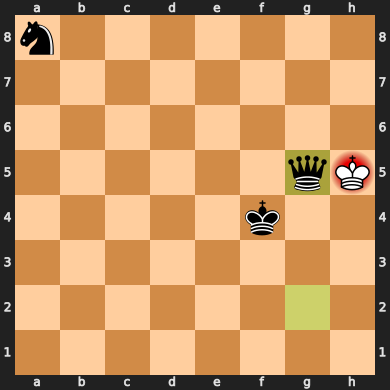

'0-1'

In [6]:
import chess

def alphabeta(board, depth, alpha, beta, is_maximizing, color=True):
    # Check game over
    if depth == 0 or board.is_game_over():
        return evaluate_board(board, color)

    # My turn
    if is_maximizing:
        best_score = -float('inf')
        for move in board.generate_legal_moves():
            board.push(move)
            best_score = max(best_score, alphabeta(board, depth-1, alpha, beta, False, color))
            board.pop()
            alpha = max(alpha, best_score)
            if alpha >= beta:
                return best_score
    # Ennemy Response
    else:
        best_score = float('inf')
        for move in board.generate_legal_moves():
            board.push(move)
            best_score = min(best_score, alphabeta(board, depth-1, alpha, beta, True, color))
            board.pop()
            beta = min(beta, best_score)
            if alpha >= beta:
                return best_score
    return best_score


def get_best_move_alphabeta(board, depth, color=True):
    # default player color is white, True is white, False is black
    # Initialisation
    best_moves = []
    best_value = float('-inf')
    
    # For each legal move
    for move in board.generate_legal_moves():
        # Play the move & evaluate its value
        board.push(move)
        value = alphabeta(board, depth - 1, float('-inf'), float('inf'), False, color)
        board.pop()
        
        # Update best value & best moves
        if value > best_value:
            best_value = value
            best_moves = [move]
        elif value == best_value:
            best_moves.append(move)
    
    # Choix aléatoire parmi les meilleurs coups
    return random.choice(best_moves)


def minimax_vs_alphabeta(depth=3):
    """
    Fait jouer Minimax contre AlphaBeta
    """
    board = chess.Board()
    while not board.is_game_over():
        if board.turn:  # White with Minimax
            move = get_best_move_minimax(board, depth, color=True)
        else:  # Black with AlphaBeta
            move = get_best_move_alphabeta(board, depth, color=False)
        
        board.push(move)
        display(board)
    
    return board.result()

minimax_vs_alphabeta(depth=3)

### Question 2

Programmez un joueur humain (qui demande au clavier le coup à jouer). Battez votre IA (ou pas).

In [ ]:
def get_human_move(board):
    while True:
        try:
            move_uci = input("Entrez votre coup (format UCI, ex: e2e4): ")
            move = chess.Move.from_uci(move_uci)
            if move in board.legal_moves:
                return move
            else:
                print("Coup invalide!")
        except:
            print("Format invalide! Utilisez la notation UCI (ex: e2e4)")

def play_human_vs_alphabeta(depth=3):
    board = chess.Board()
    while not board.is_game_over():
        if board.turn:  # White with human
            move = get_human_move(board)
        else:  # Black with AlphaBeta
            move = get_best_move_alphabeta(board, depth, color=False)
        
        board.push(move)
        display(board)
    
    return board.result()

play_human_vs_alphabeta(depth=3)

Format invalide! Utilisez la notation UCI (ex: e2e4)
Format invalide! Utilisez la notation UCI (ex: e2e4)
Format invalide! Utilisez la notation UCI (ex: e2e4)
Format invalide! Utilisez la notation UCI (ex: e2e4)
Format invalide! Utilisez la notation UCI (ex: e2e4)
Format invalide! Utilisez la notation UCI (ex: e2e4)
